# **Trabajo final Análisis de Series de Tiempo**

## **Integrantes**

- Maximiliano José Bernardo.
- Alejandro Nicolás Tacchella.

## **Descripción de los datos**

### **Origen**

Dataset proporcionado por ACTrans (Asociación Civil de Transporte). La Asociación Civil de Transporte fue constituida el 20 de mayo de 2010, como coadministrador y contralor del Sistema Único de Boleto Electrónico SUBE implementado por el Decreto del Poder Ejecutivo Nacional Nº 84 del 4 de febrero de 2009 y sus normas complementarias.

Página web: https://www.actrans.com.ar/web

### **Variables**

- FECHA: Fecha de las operaciones. Tipo: Fecha.

- LINEA: Código del recorrido. Tipo: Categórico.

- CANT. TRX: Cantidad de transacciones efectuadas (pasajeros). Tipo: Númerico.

- RECAUDACION: Cantidad de dinero recaudado. Tipo: Númerico.

- KM: Distancia total diaria recorrida. Tipo: Númerico.


## **Planteamiento de la pregunta de investigación**

¿Cómo evolucionan las transacciones diarias por los recorridos de autobús entre 2020 y 2025? ¿Es posible predecir la demanda futura con modelos de series temporales?

In [69]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX

## **Análisis exploratorio de datos (EDA)**

In [70]:
# Leer todas las hojas del Excel
archivo_excel = "trx_recaudacion_km_empresa_54_2020_2025.xlsx"
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Lista para guardar los DataFrames transformados
df_lista = []

for nombre_hoja, df in hojas.items():
    df = df.set_index('FECHA', drop=False)  # establecer FECHA como índice
    df['LINEA'] = nombre_hoja.strip()  # agregar nombre de hoja como línea
    df_lista.append(df)
    print(f"Línea: {nombre_hoja}")
    display(df.info())

Línea: 166
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1988 non-null   float64       
 2   RECAUDACION  1988 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 236
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1988 non-null   float64       
 2   RECAUDACION  1988 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 269
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1987 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 395
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1986 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 441
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1986 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 443
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1985 non-null   float64       
 2   RECAUDACION  1985 non-null   float64       
 3   KM           1985 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 504
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1987 non-null   float64       
 2   RECAUDACION  1987 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 634
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1985 non-null   float64       
 2   RECAUDACION  1985 non-null   float64       
 3   KM           1987 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 504I
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1889 non-null   float64       
 2   RECAUDACION  1889 non-null   float64       
 3   KM           1899 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

### **Tratamiento de valores nulos**

Podemos observar que unicamente en los features CANT. TRX, RECAUDACION y KM encontramos valores nulos. Para no eliminar una fecha de la serie procedemos a imputarlos con el último valor no nulo conocido.

In [71]:
# Completamos valores nulos en CANT. TRX, RECAUDACION y KM
for df_linea in df_lista:
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df_linea['CANT. TRX'] = df_linea['CANT. TRX'].ffill()
    df_linea['RECAUDACION'] = df_linea['RECAUDACION'].ffill()
    df_linea['KM'] = df_linea['KM'].ffill()

In [72]:
# Unir todos los DataFrames
df_final = pd.concat(df_lista, ignore_index=True)

# Reordenar columnas
columnas = ['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
df_final = df_final[columnas]

In [73]:
df_final

FECHA LINEA  CANT. TRX  RECAUDACION         KM
0     2020-01-01   166     9121.0    142707.83   8350.738
1     2020-01-02   166    34135.0    493514.22  15555.049
2     2020-01-03   166    37207.0    535227.08  15866.048
3     2020-01-04   166    31732.0    470262.62  16829.046
4     2020-01-05   166    22091.0    329308.39  12240.411
...          ...   ...        ...          ...        ...
17896 2025-06-07  504I      336.0    127582.38    650.192
17897 2025-06-08  504I      204.0     75651.72    668.249
17898 2025-06-09  504I      967.0    320191.52    946.772
17899 2025-06-10  504I      926.0    289751.48    927.829
17900 2025-06-11  504I      904.0    302785.03   1005.842

[17901 rows x 5 columns]

In [74]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17901 non-null  datetime64[ns]
 1   LINEA        17901 non-null  object        
 2   CANT. TRX    17901 non-null  float64       
 3   RECAUDACION  17901 non-null  float64       
 4   KM           17901 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 699.4+ KB


### **Features adicionales**

Agregamos features de nombre_dia y nombre_mes calculados a partir de FECHA de manera de tener ciertas referencias para los gráficos a continuación.

In [75]:
df = df_final

df['nombre_dia'] = df['FECHA'].dt.day_name()

#aseguro el orden correcto de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nombre_dia'] = pd.Categorical(df['nombre_dia'], categories=dias_ordenados, ordered=True)

df['nombre_mes'] = df['FECHA'].dt.month_name()

# Para asegurar el orden correcto
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df['nombre_mes'] = pd.Categorical(df['nombre_mes'], categories=meses_ordenados, ordered=True)


### **Análisis de boletos vendidos por día de la semana y mes**

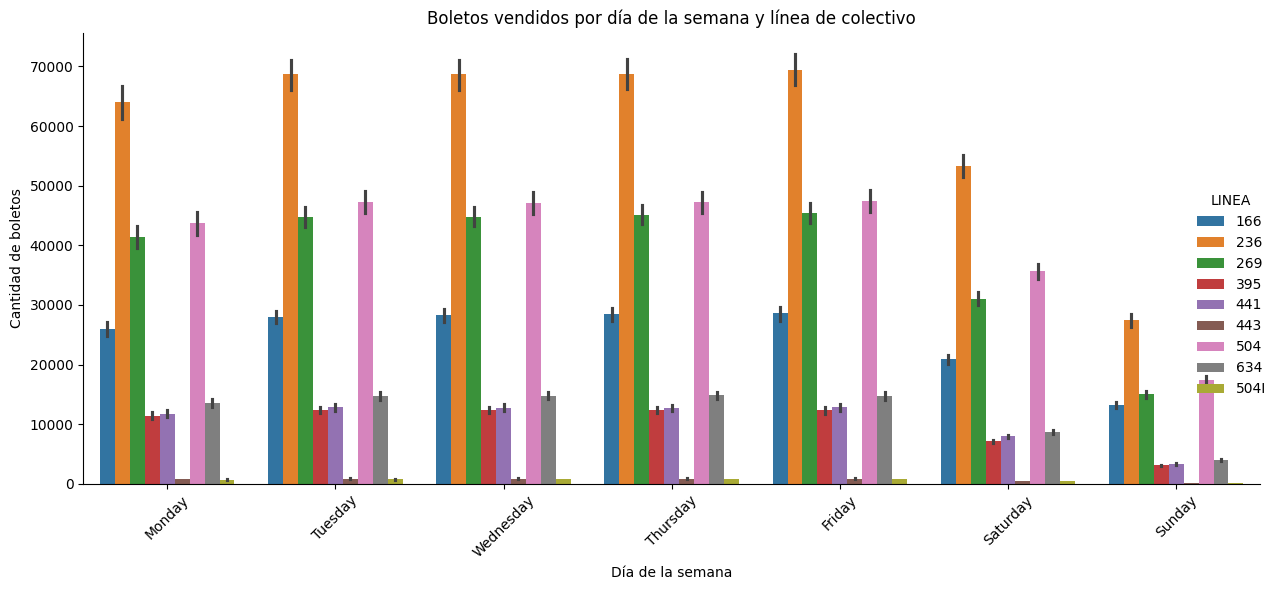

In [76]:
sns.catplot(
    data=df,
    kind="bar",
    x="nombre_dia",
    y='CANT. TRX',
    hue="LINEA",
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por día de la semana y línea de colectivo")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

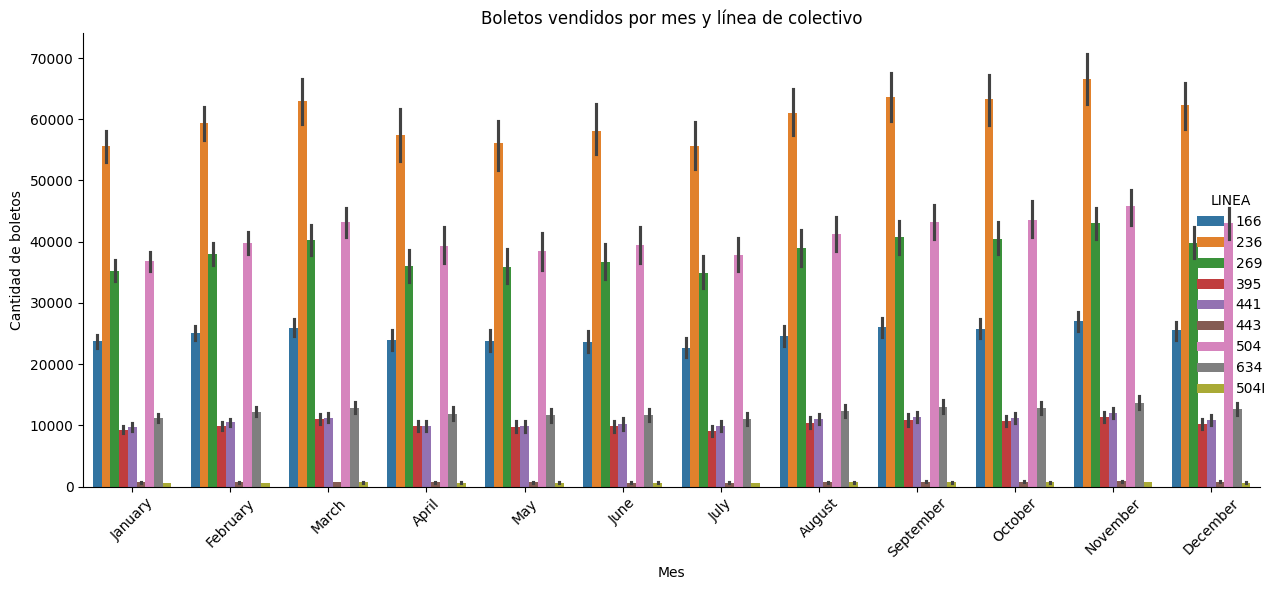

In [77]:

sns.catplot(
    data=df,
    kind="bar",
    x="nombre_mes",
    y='CANT. TRX',
    hue='LINEA',
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por mes y línea de colectivo")
plt.xlabel("Mes")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hay una clara predominancia de boletos vendidos por parte de la línea 236, y muy pocos por parte de las líneas 634 y 504I.

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_25764/1030630302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()


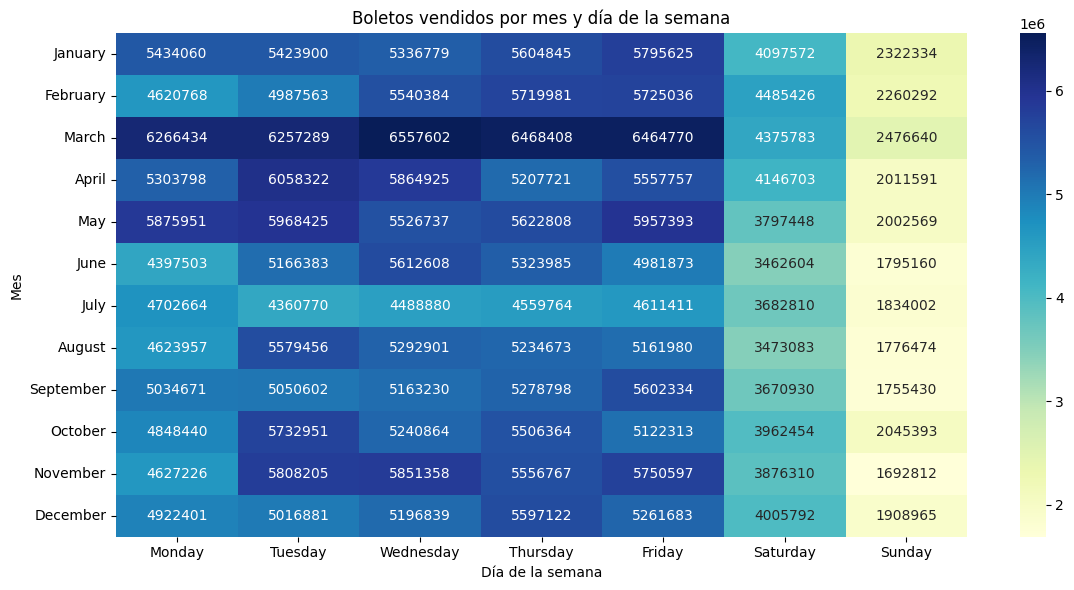

In [78]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Boletos vendidos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

Con el gráfico previo podemos sospechar que hay tanto tendencias semanales como mensuales. Por ejemplo, en Marzo durante los días Miércoles, Jueves y Viernes se nota la mayor concentración de pasajeros. Pero en Julio, durante los mismos días se ve la menor concentración de pasajeros. Esto sin contar los fines de semana que claramente son siempre días que tienen poca demanda de pasajeros.

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_25764/1233145774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['KM'].sum().unstack()


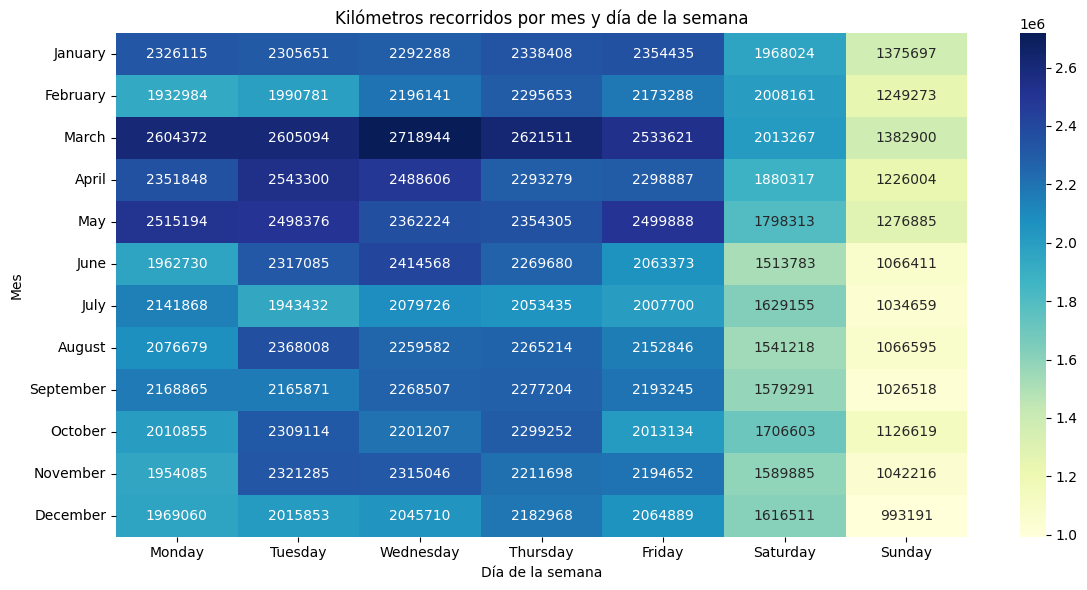

In [79]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['KM'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Kilómetros recorridos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

Este último gráfico es interesante para denotar que hay una relación entre los kilómetros recorridos y la demanda de pasajeros. Ya que son gráficos donde las tendencias se ven bastante similares.

### **QQ Plot**

Comparamos los datos de cada Línea contra las distribuciones Normal y Chi2, para ver si se ajustan a las mismas.

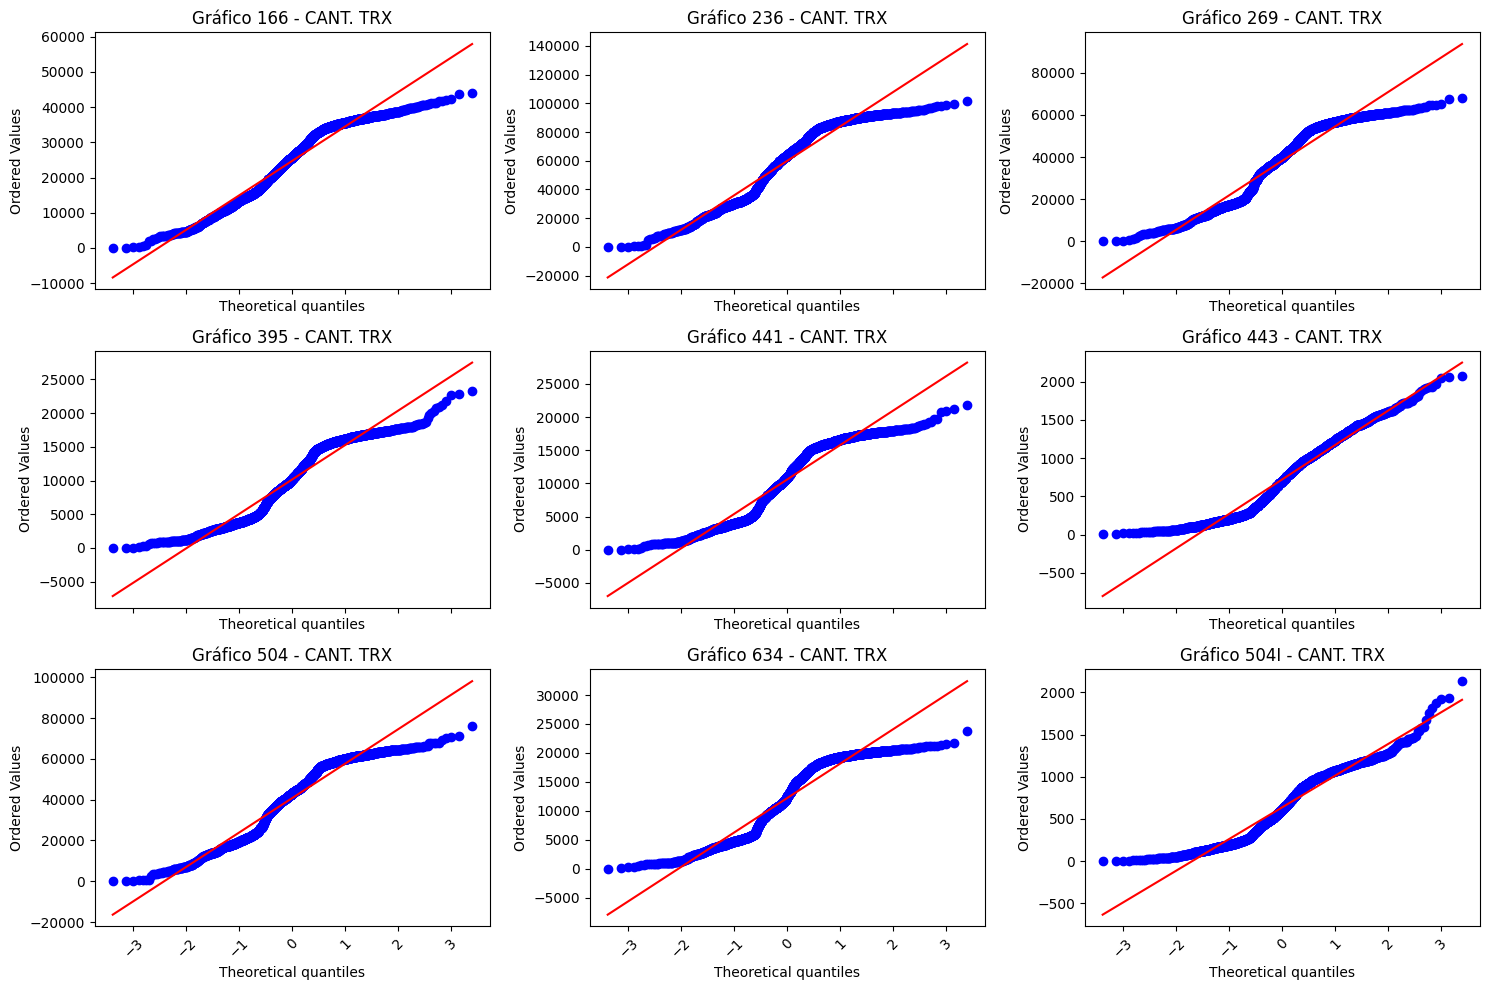

In [80]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
axs = axs.flatten()  # Aplana la matriz de ejes 3x3

for i, df_linea in enumerate(df_lista):
    stats.probplot(df_linea['CANT. TRX'], dist='norm', plot=axs[i])
    axs[i].set_title(f"Gráfico {df_linea['LINEA'].iloc[0]} - CANT. TRX")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Se puede observar que los datos no se ajustan a una distribución normal, en ciertos puntos del gráfico hay algo de coincidencia pero visto globalmente no.

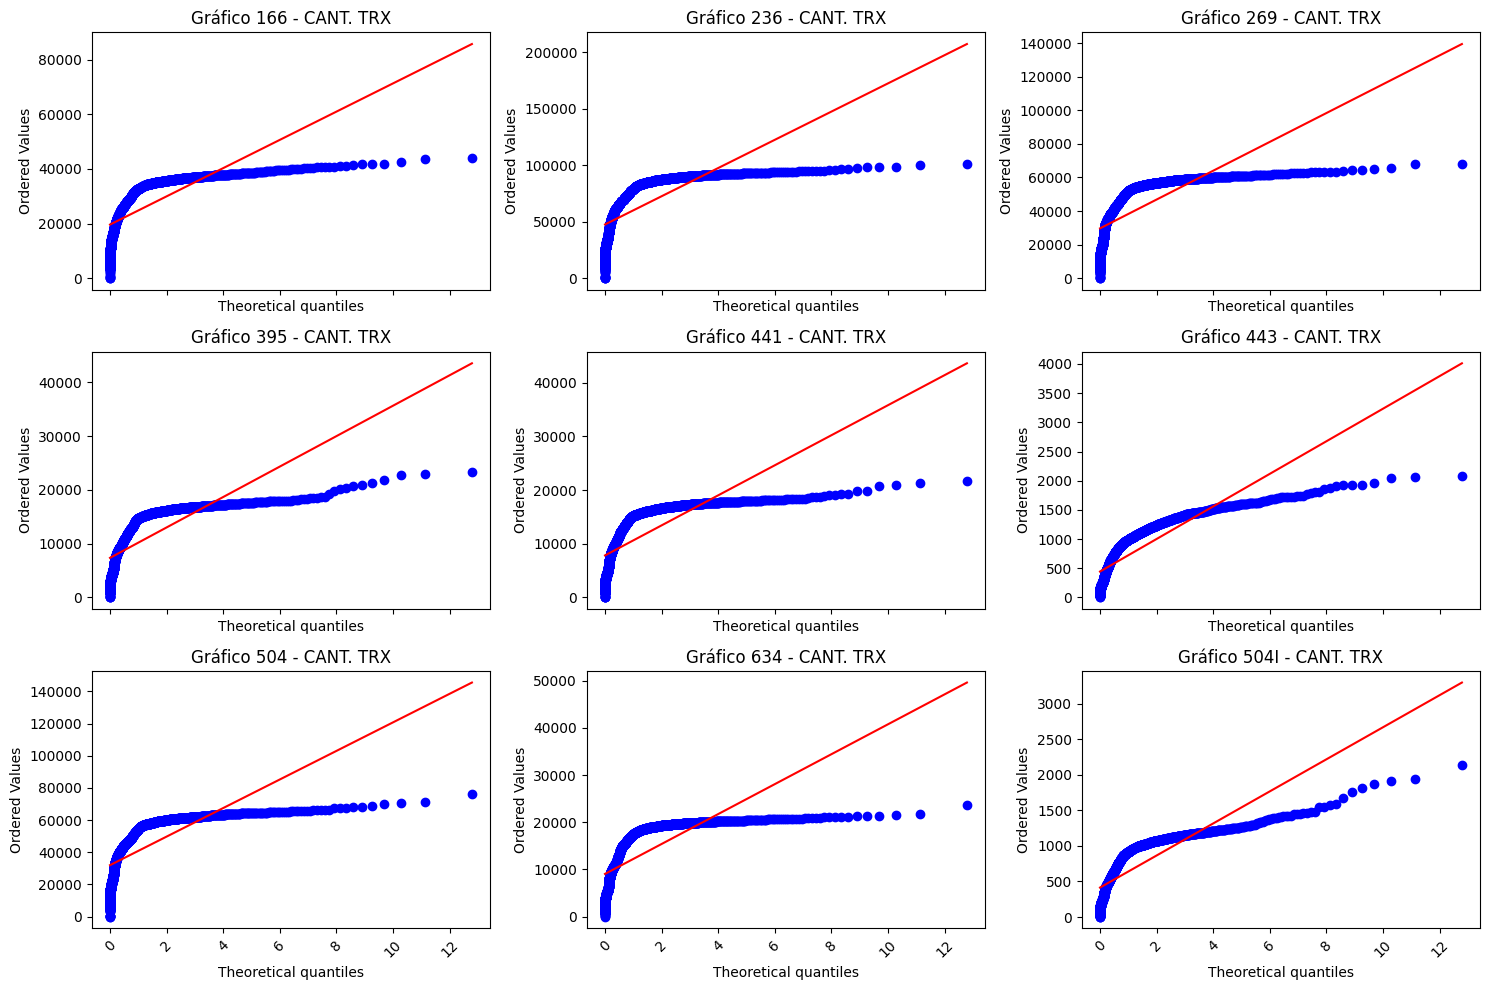

In [81]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
axs = axs.flatten()  # Aplana la matriz de ejes 3x3

for i, df_linea in enumerate(df_lista):
    stats.probplot(df_linea['CANT. TRX'], sparams=(1,), dist='chi2', plot=axs[i])
    axs[i].set_title(f"Gráfico {df_linea['LINEA'].iloc[0]} - CANT. TRX")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Aún menos que con la normal, los datos no se ajustan para nada a una distribución Chi2.

Como conclusión para la comparación con estas distribuciones podemos obtener nuestras series de tiempo no presentan una distribución Normal ni Chi2. Investigando un poco más, encontramos que esto puede deberse a que nuestras series de tiempo presentan patrones semanales los cuales no son posibles de identificar con este tipo de gráfico, ya que estos observan una distribución de manera global.

### **Comportamiento de la serie de tiempo a lo largo de los años**

Tomamos de referencia una de las líneas para evaluar diferentes periodicidades: por día, mensual y semanal.

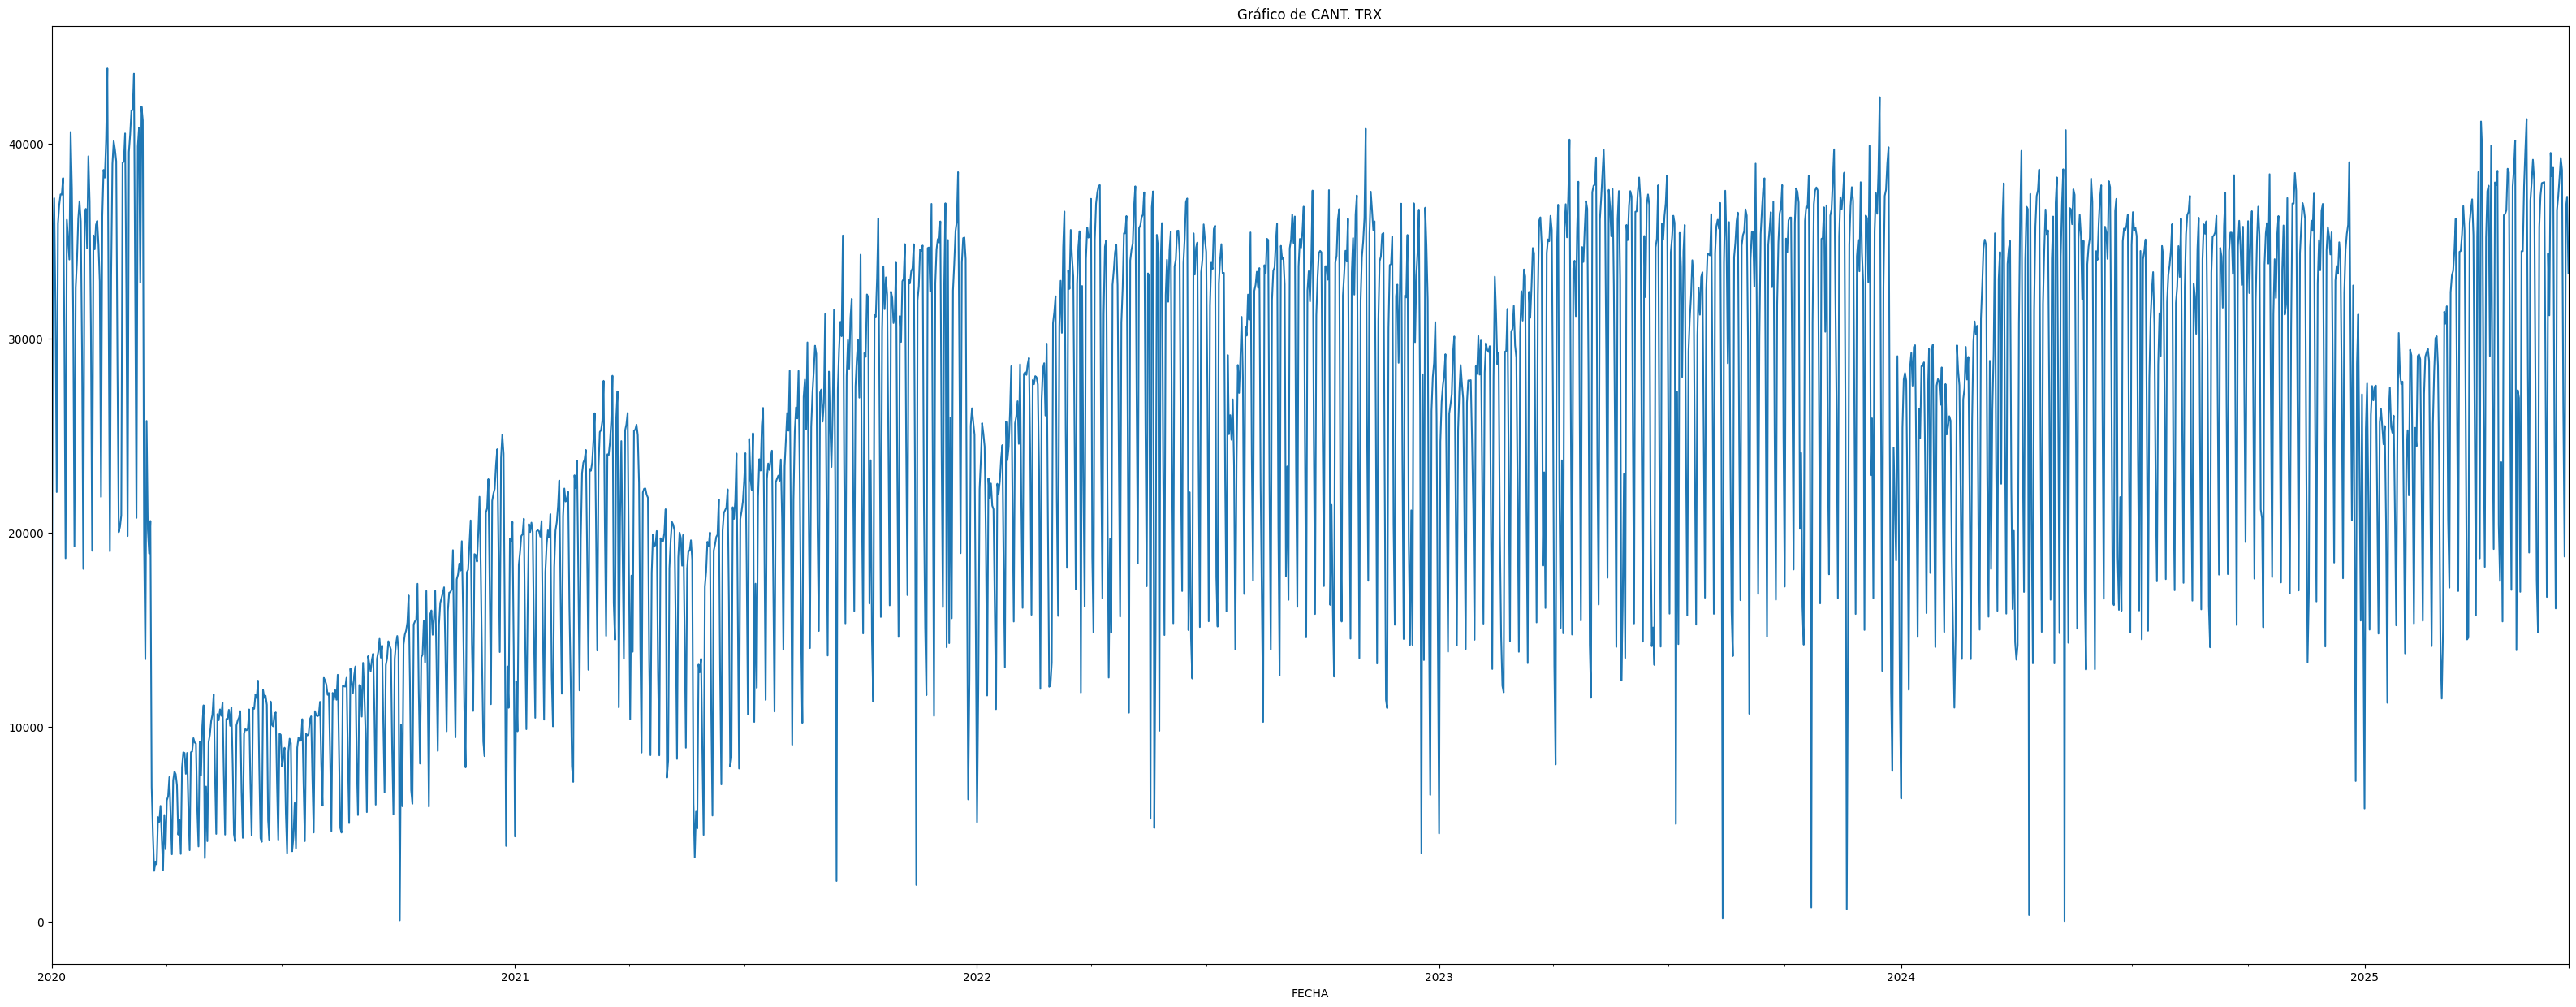

In [82]:
df_new = df_lista[0]['CANT. TRX']
df_new.plot(title="Gráfico de CANT. TRX", figsize=(40, 15))
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_25764/1488799866.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new = df_lista[0]['CANT. TRX'].resample(rule='M').mean()


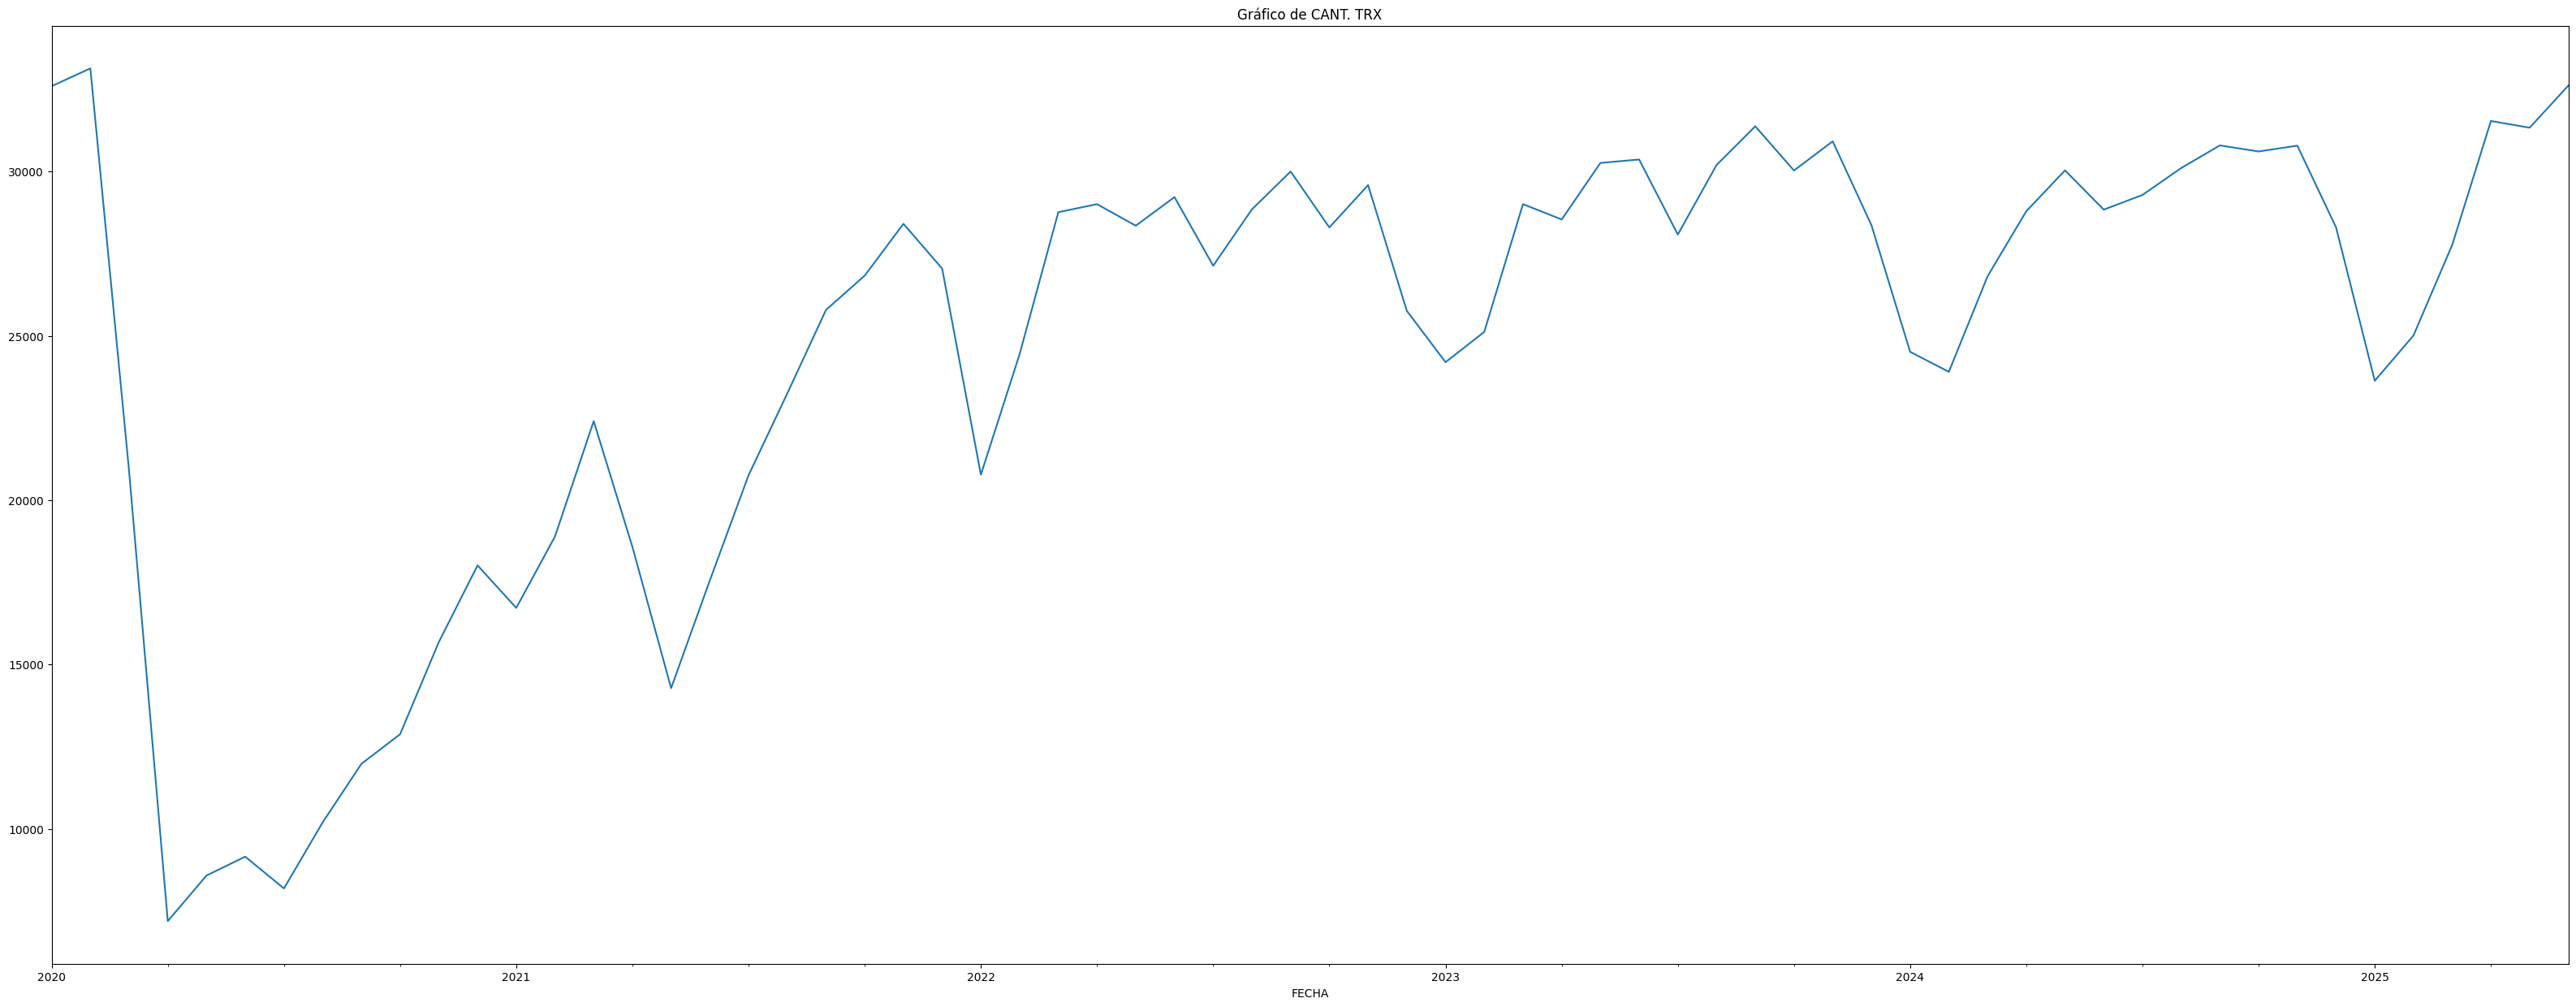

In [83]:
df_new = df_lista[0]['CANT. TRX'].resample(rule='M').mean()
df_new.plot(title="Gráfico de CANT. TRX", figsize=(40, 15))
plt.show()

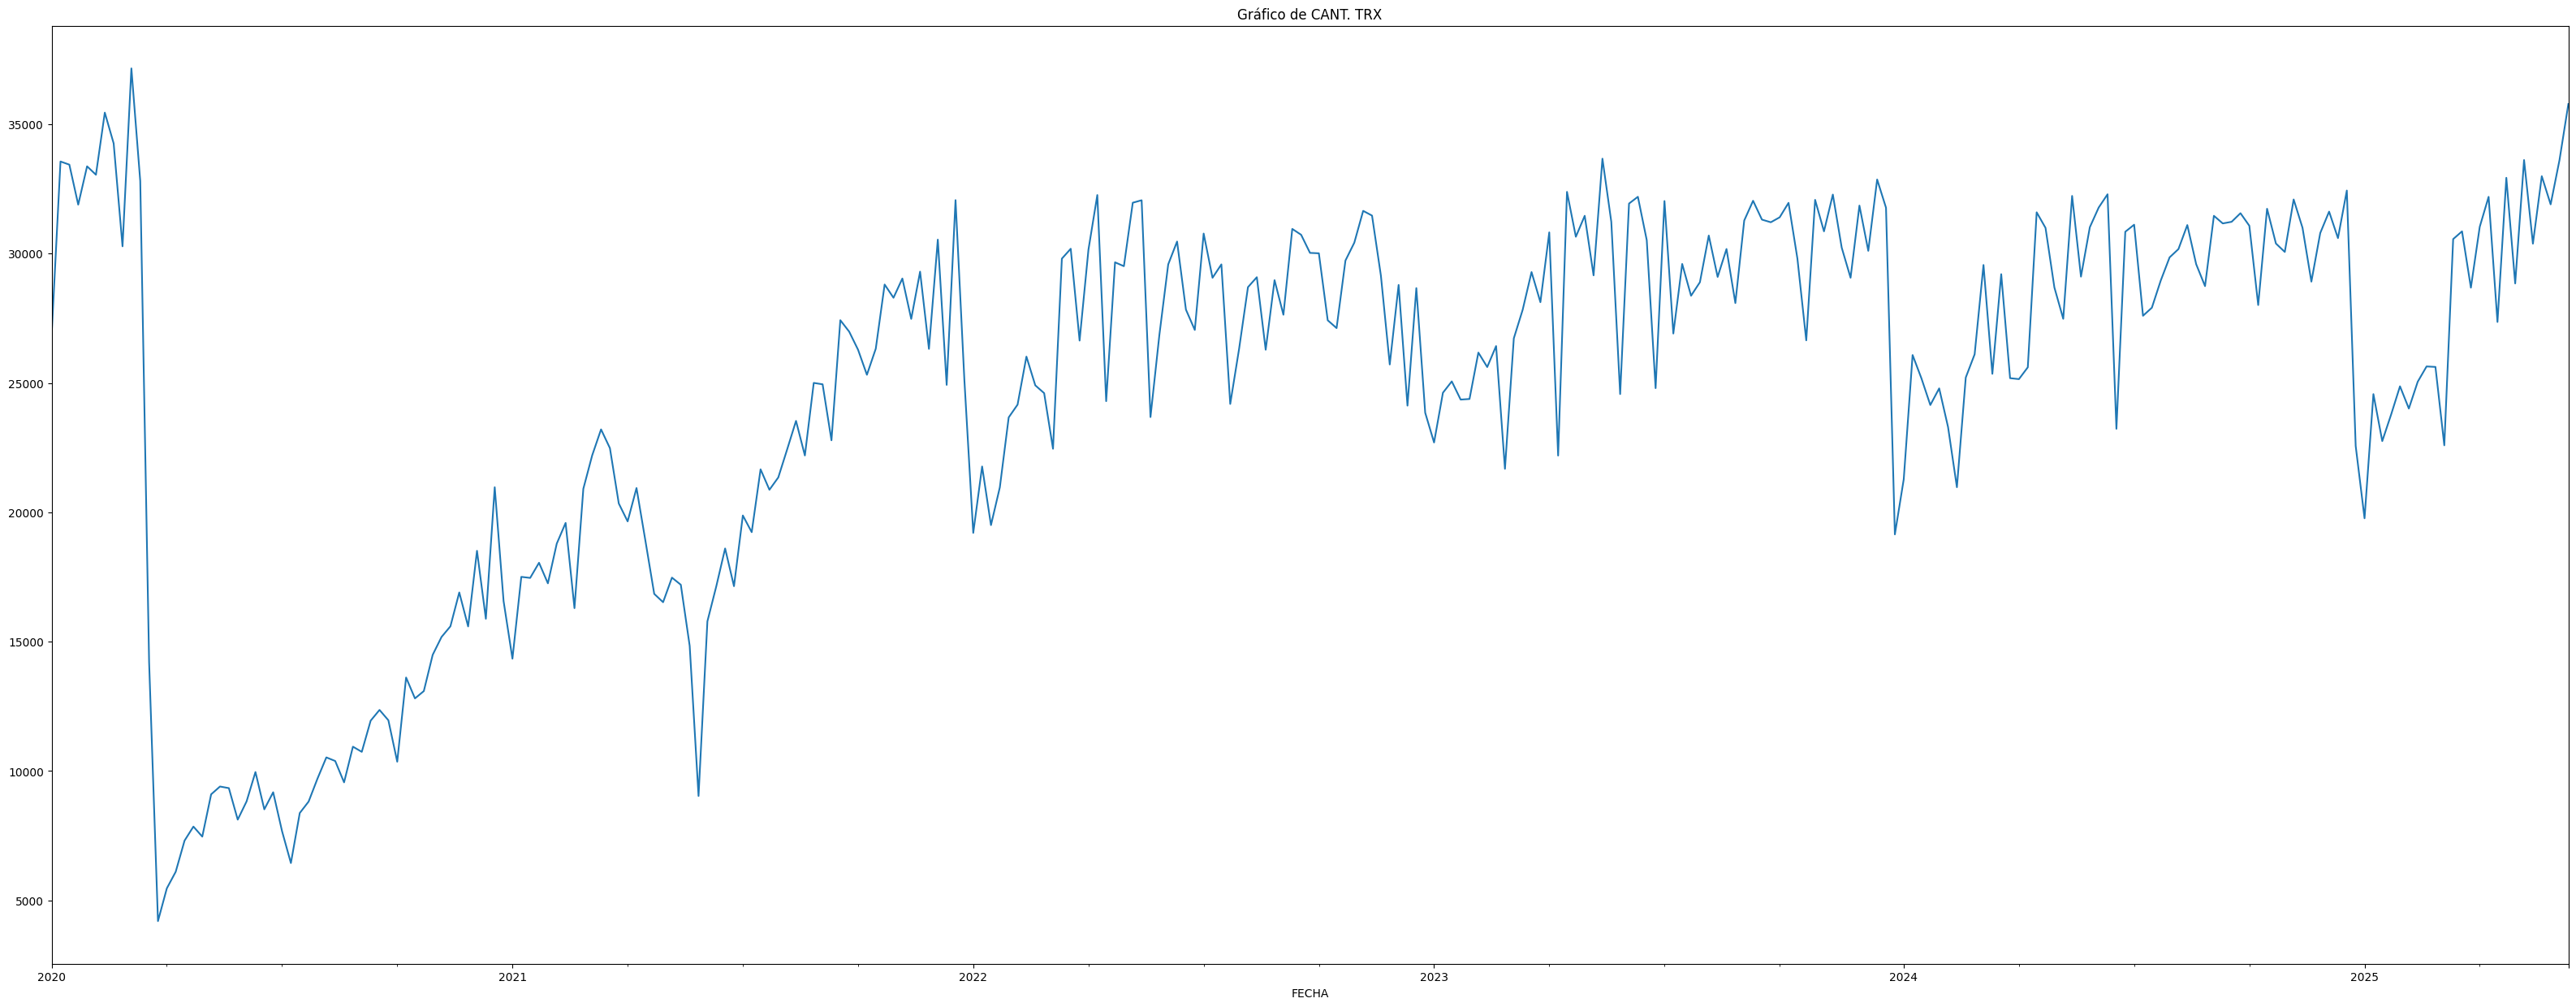

In [84]:
df_new = df_lista[0]['CANT. TRX'].resample(rule='W').mean()
df_new.plot(title="Gráfico de CANT. TRX", figsize=(40, 15))
plt.show()

De los gráficos previos el más interpretable es el de periocidad semanal, así que tomamos este como referencia para ahora graficar para todas las líneas.

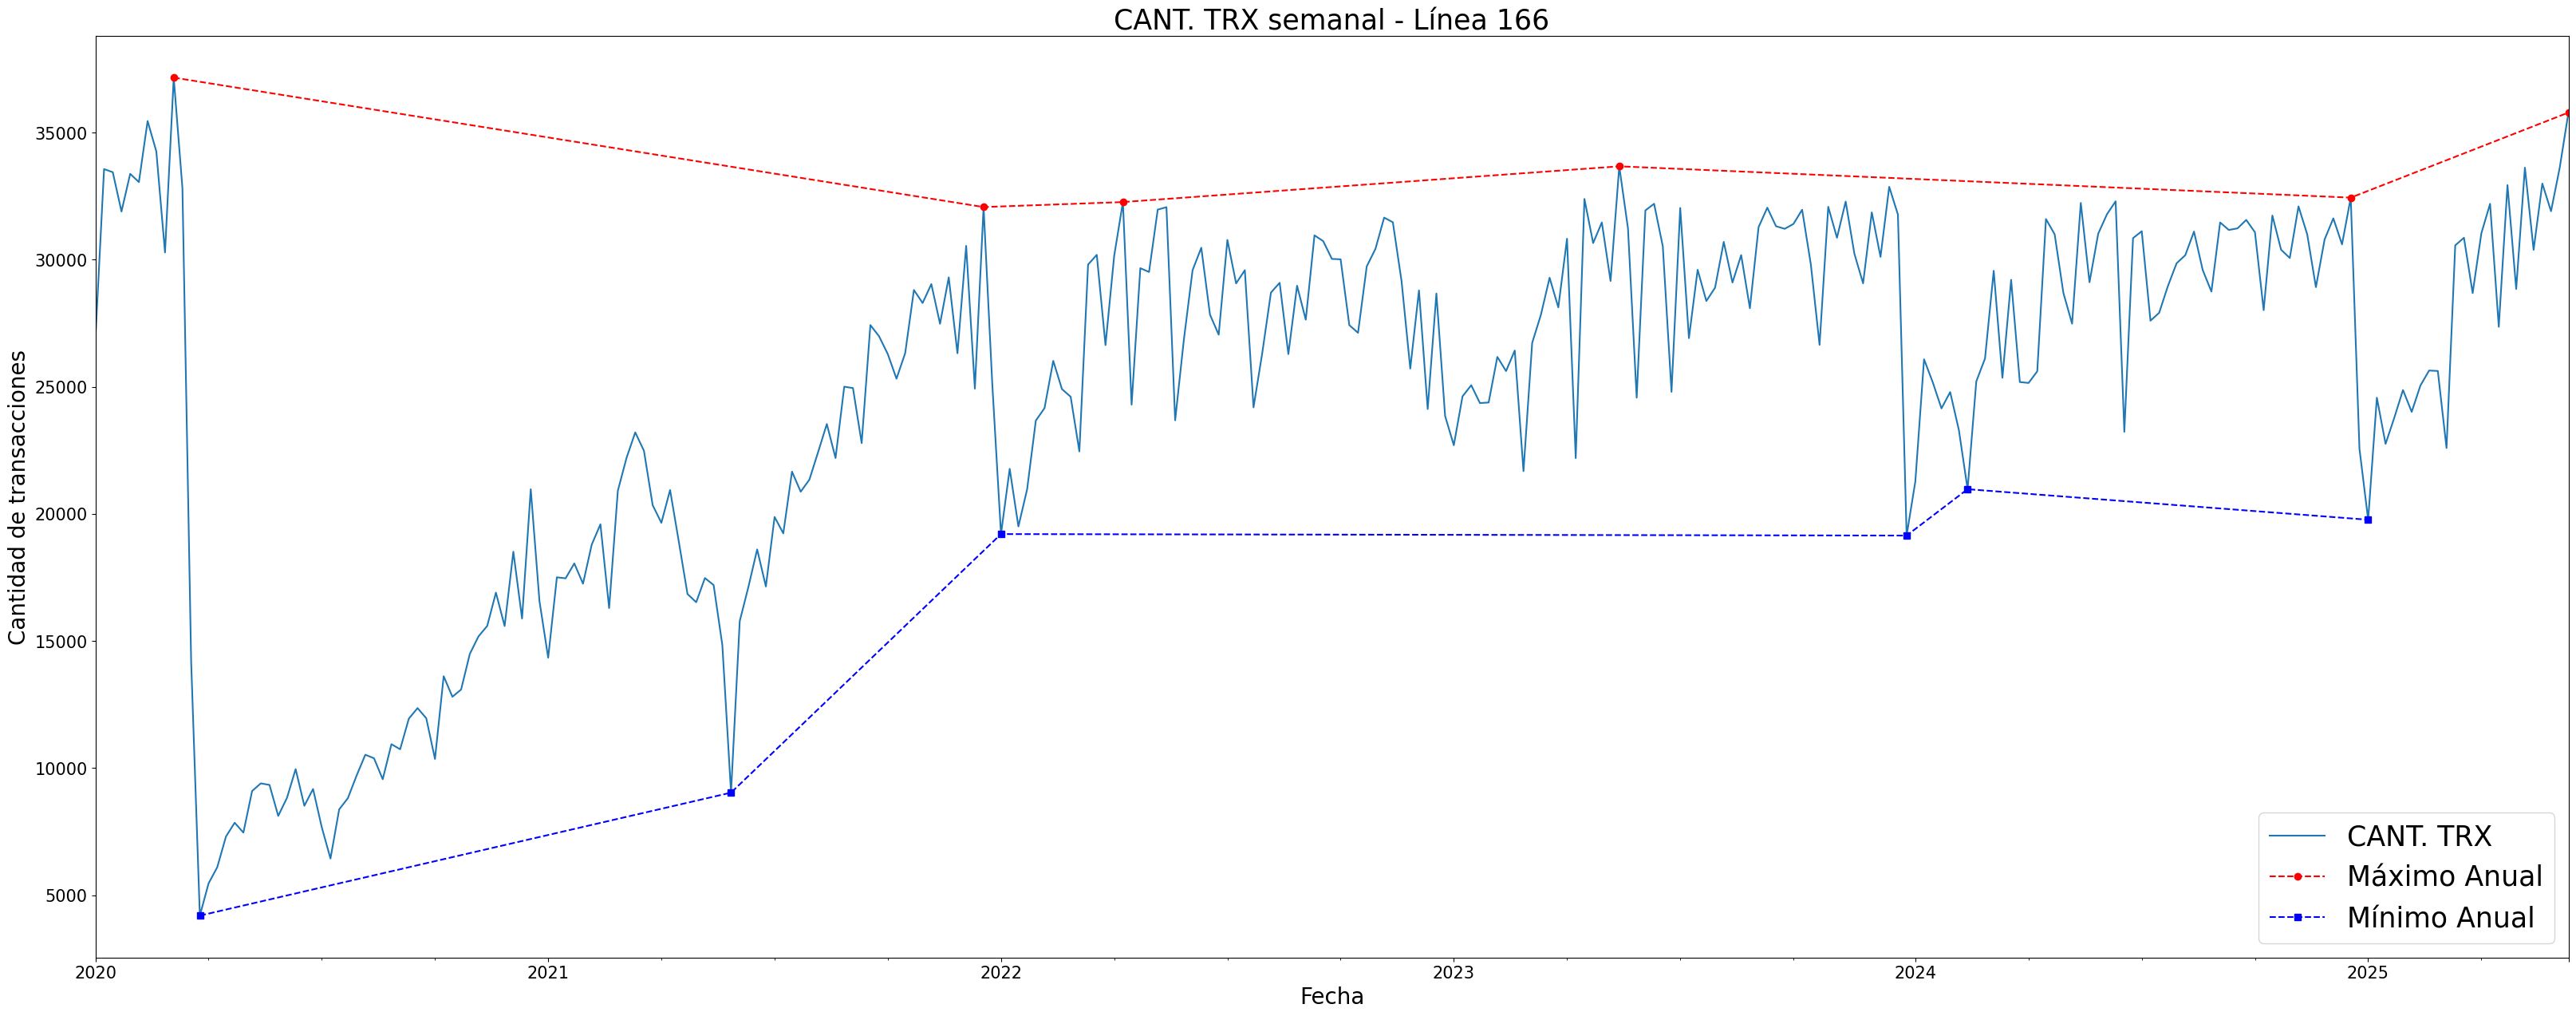

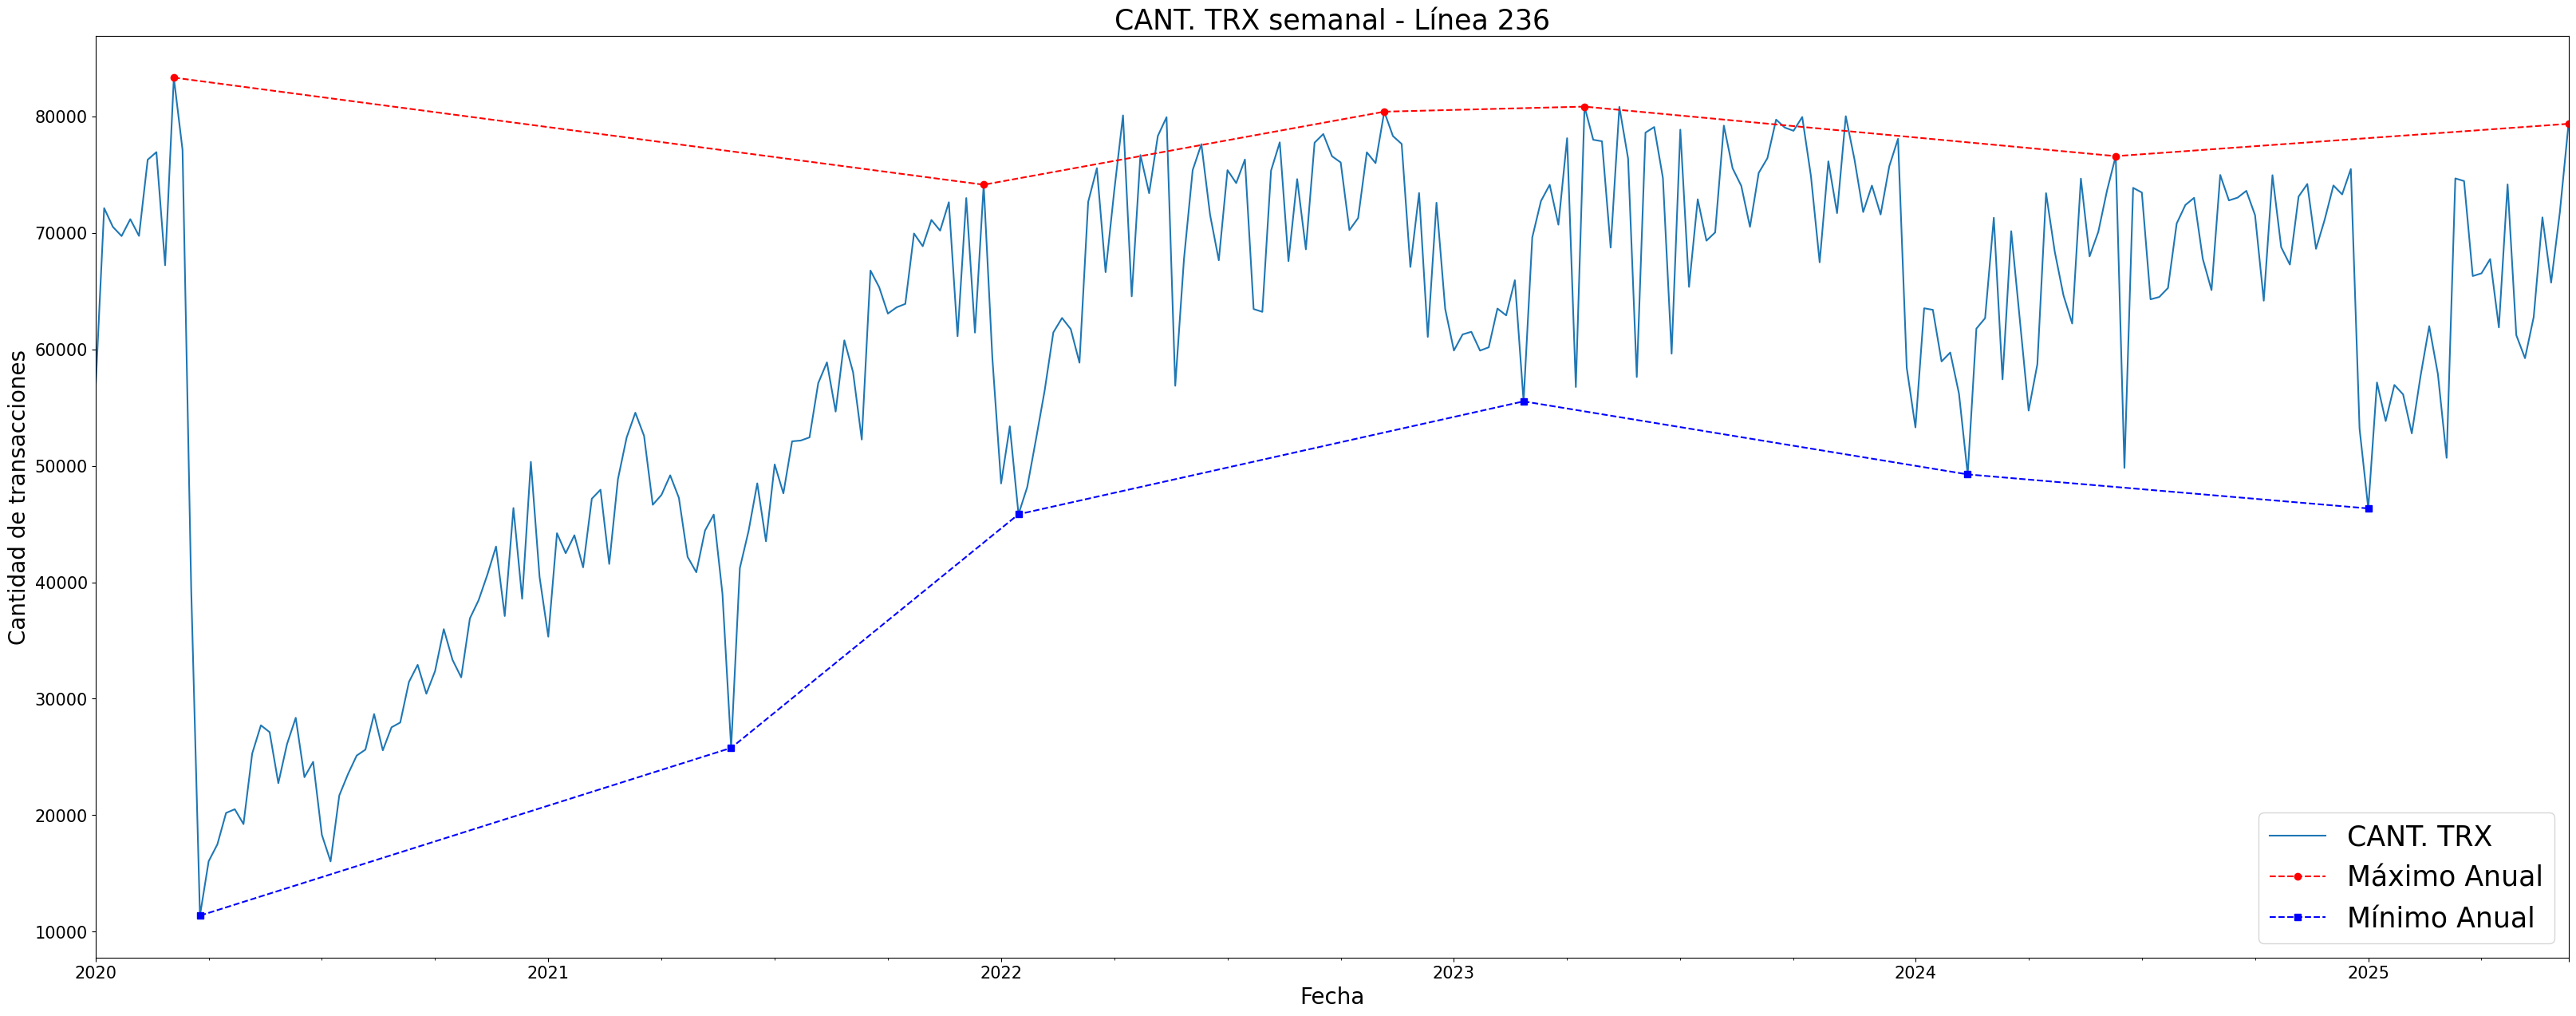

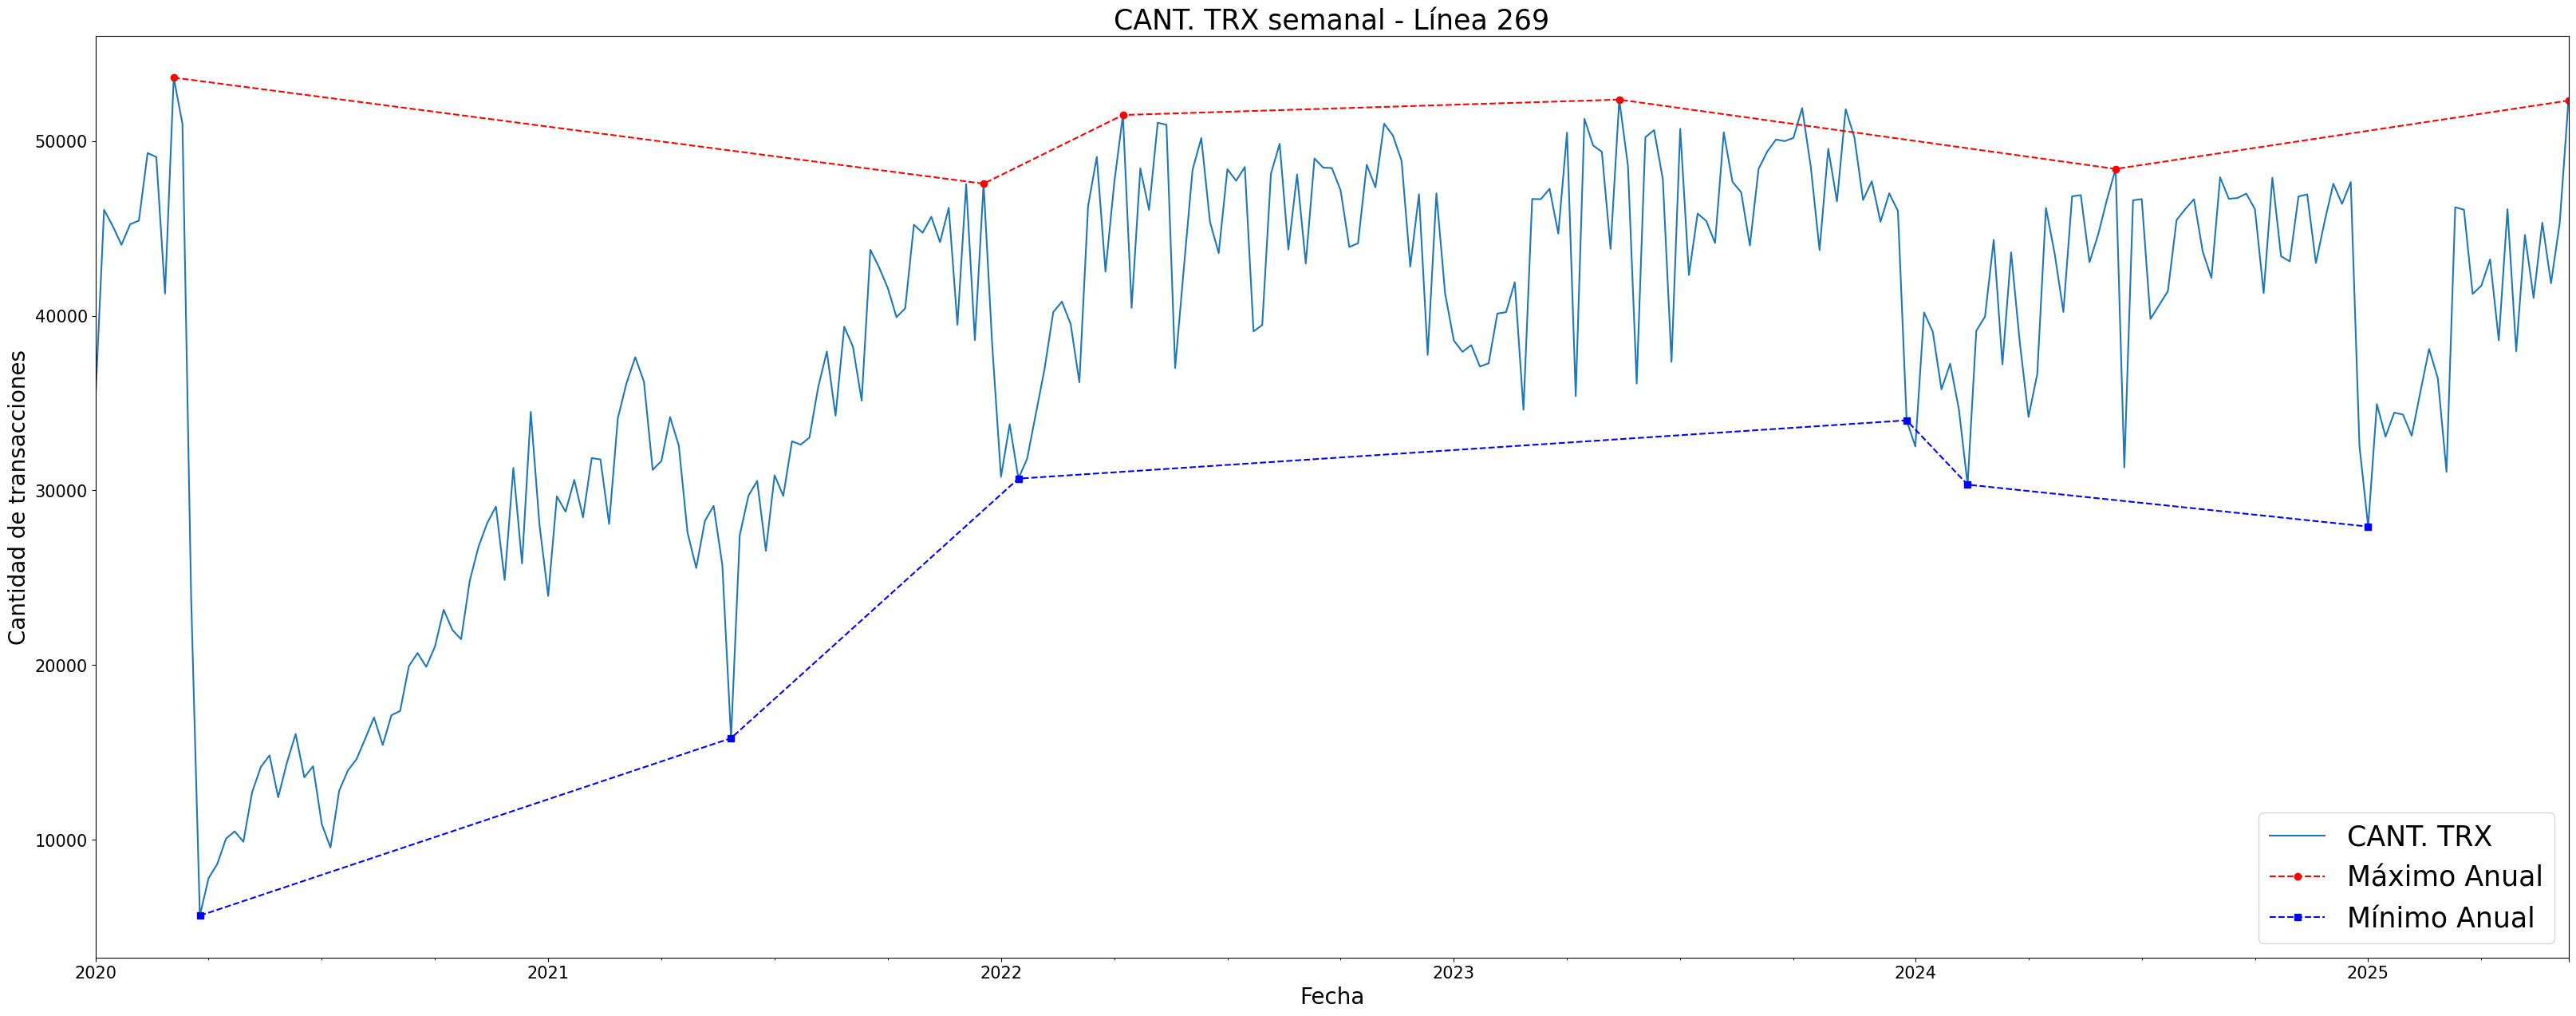

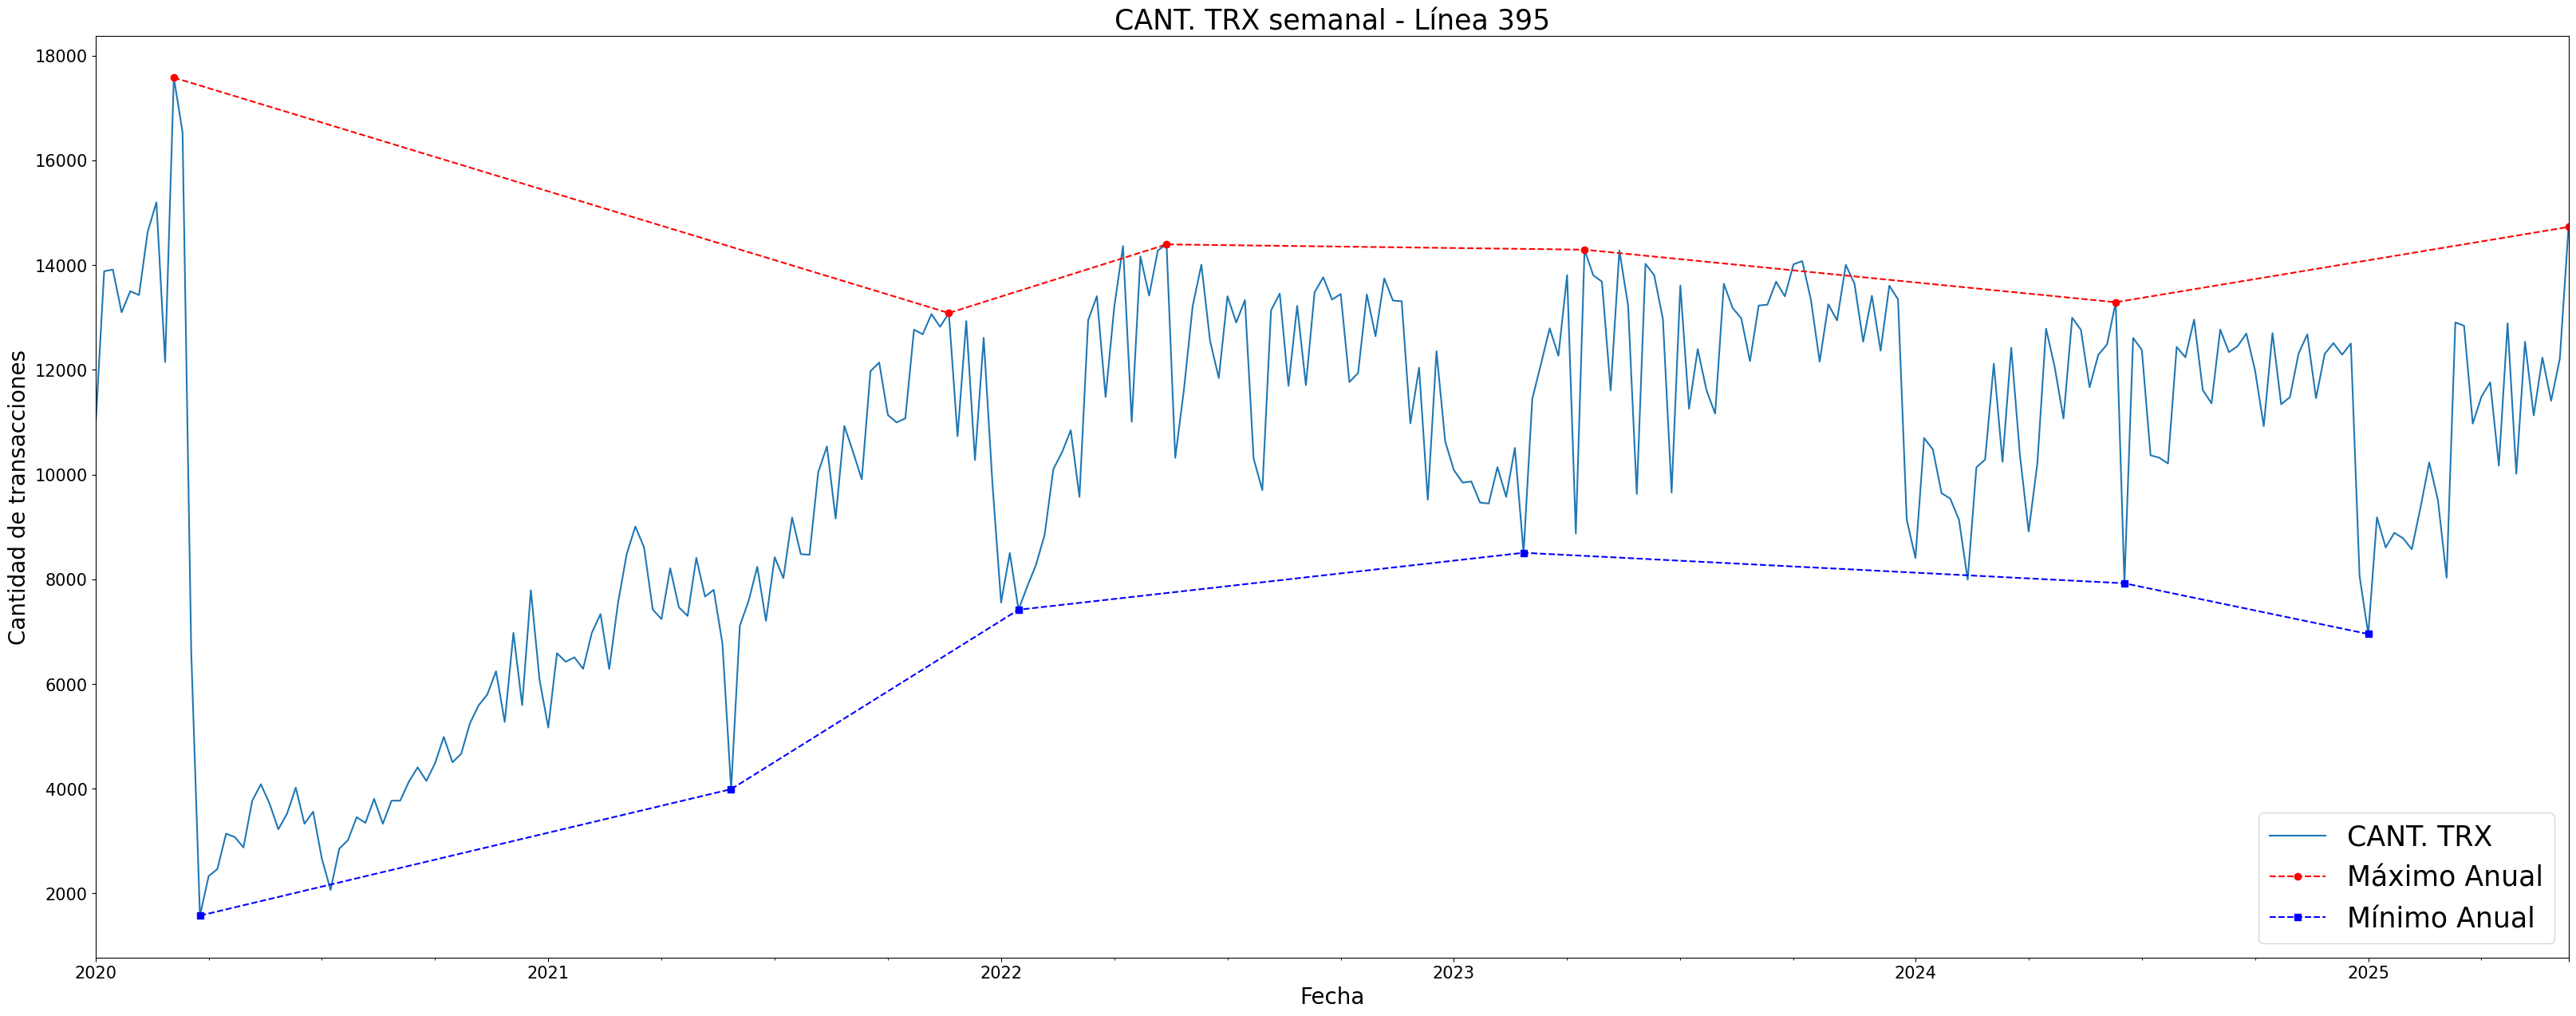

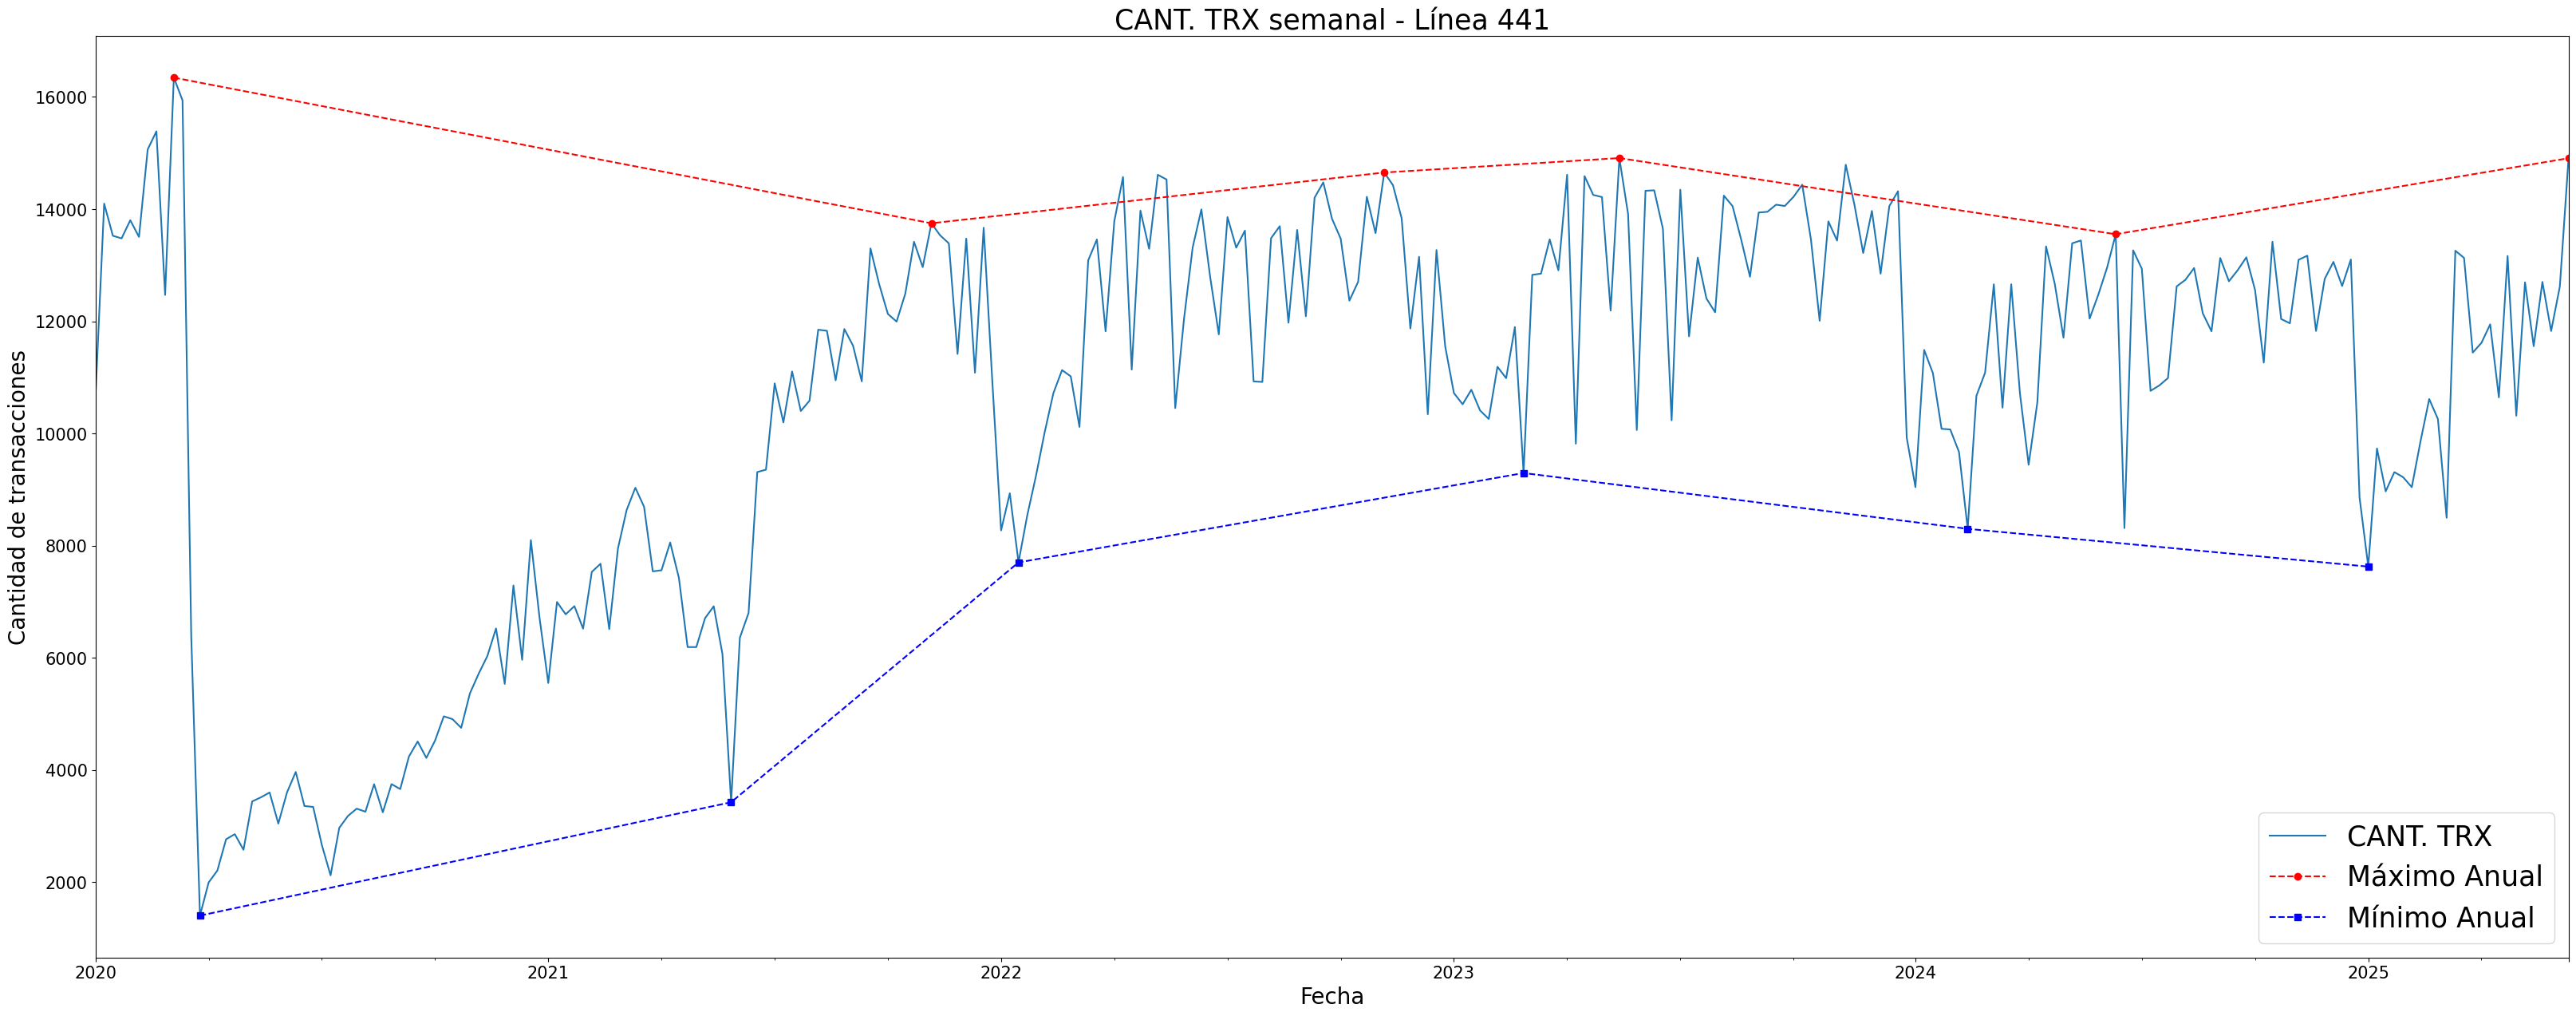

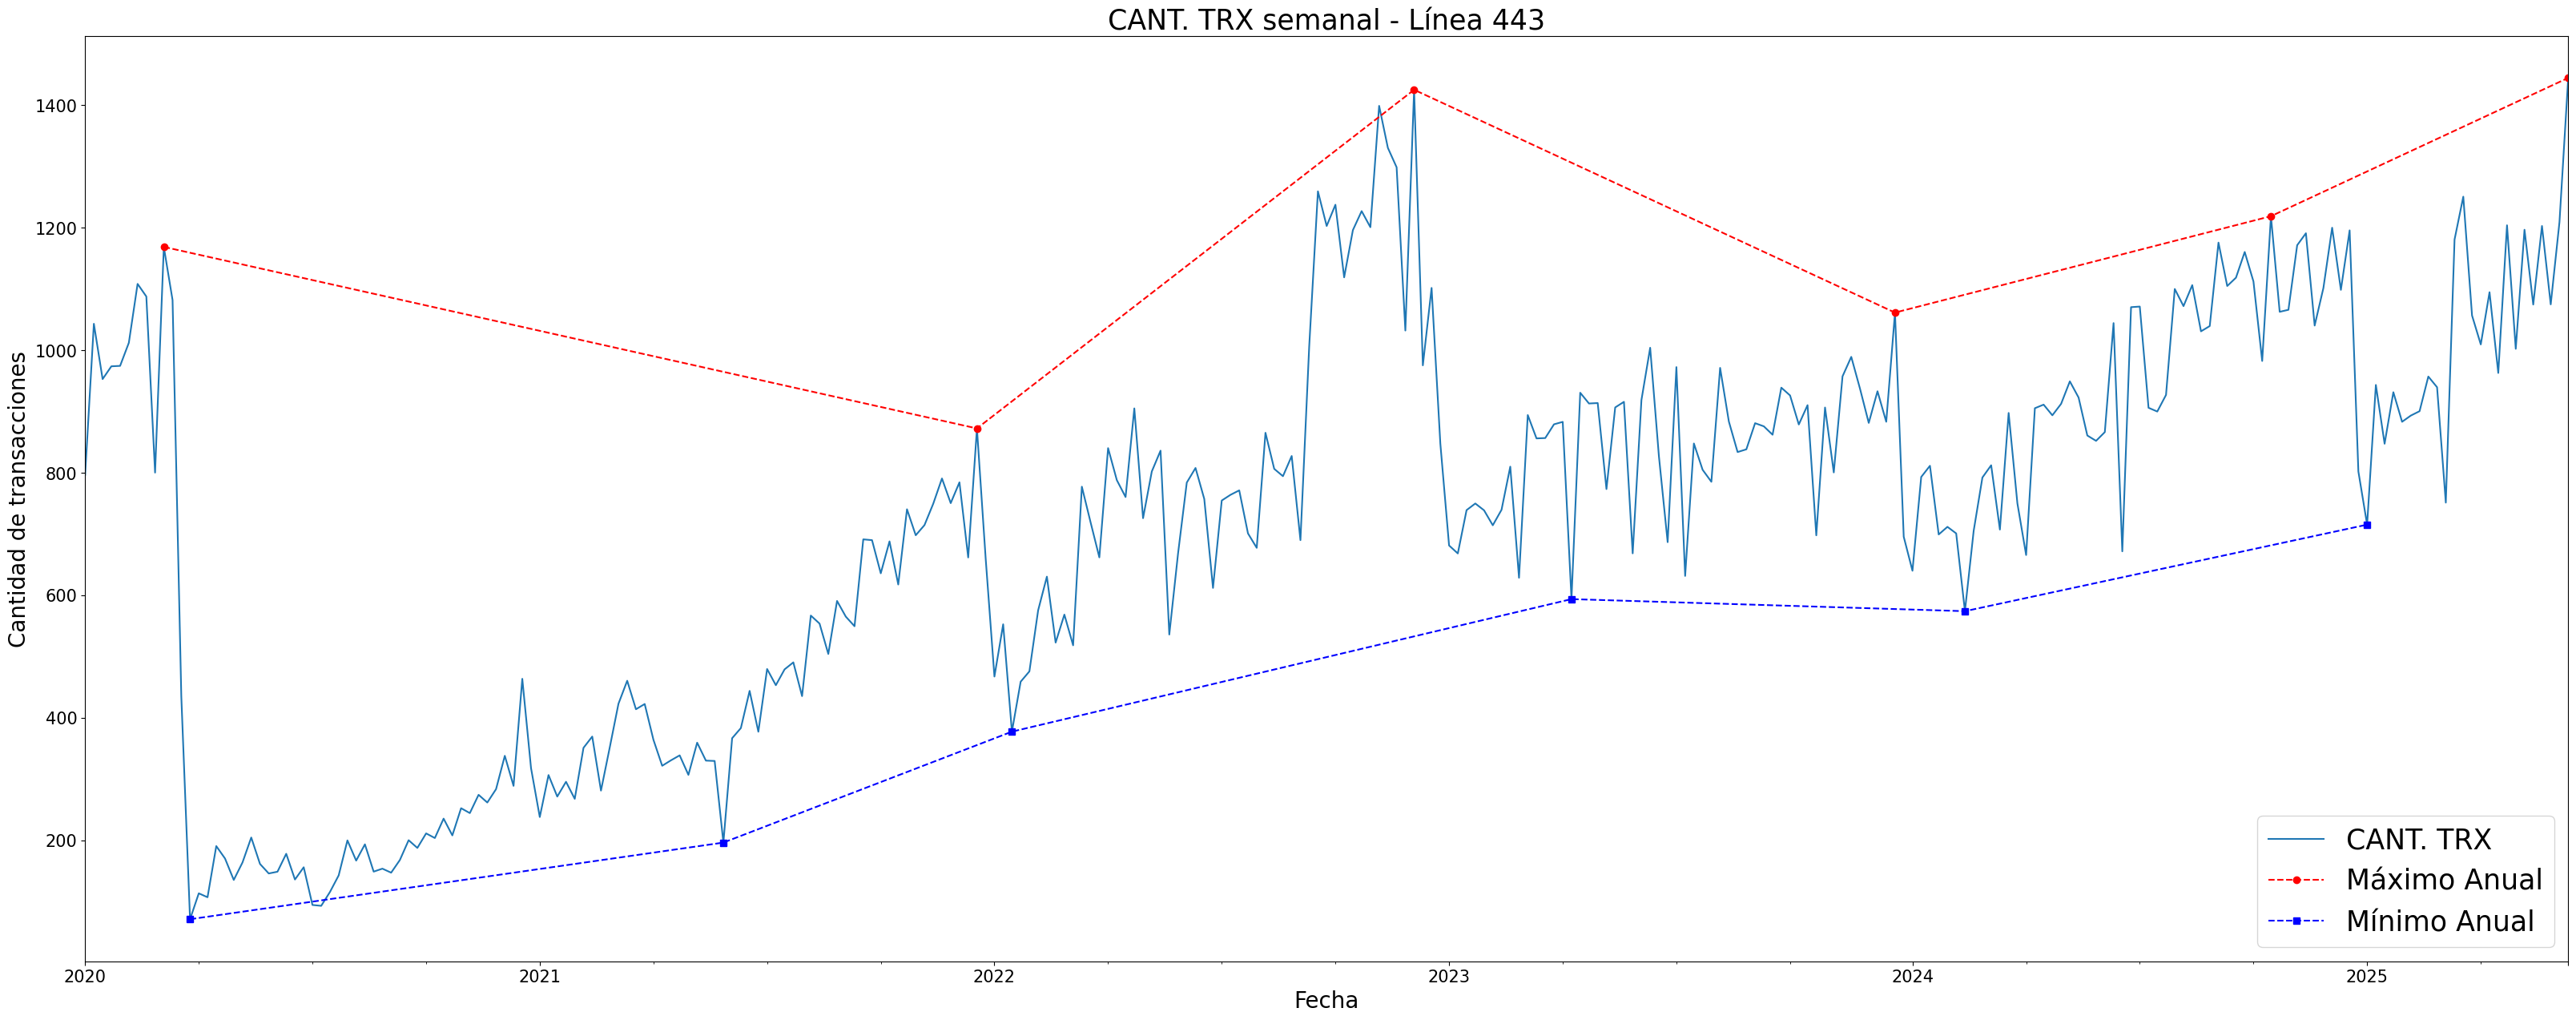

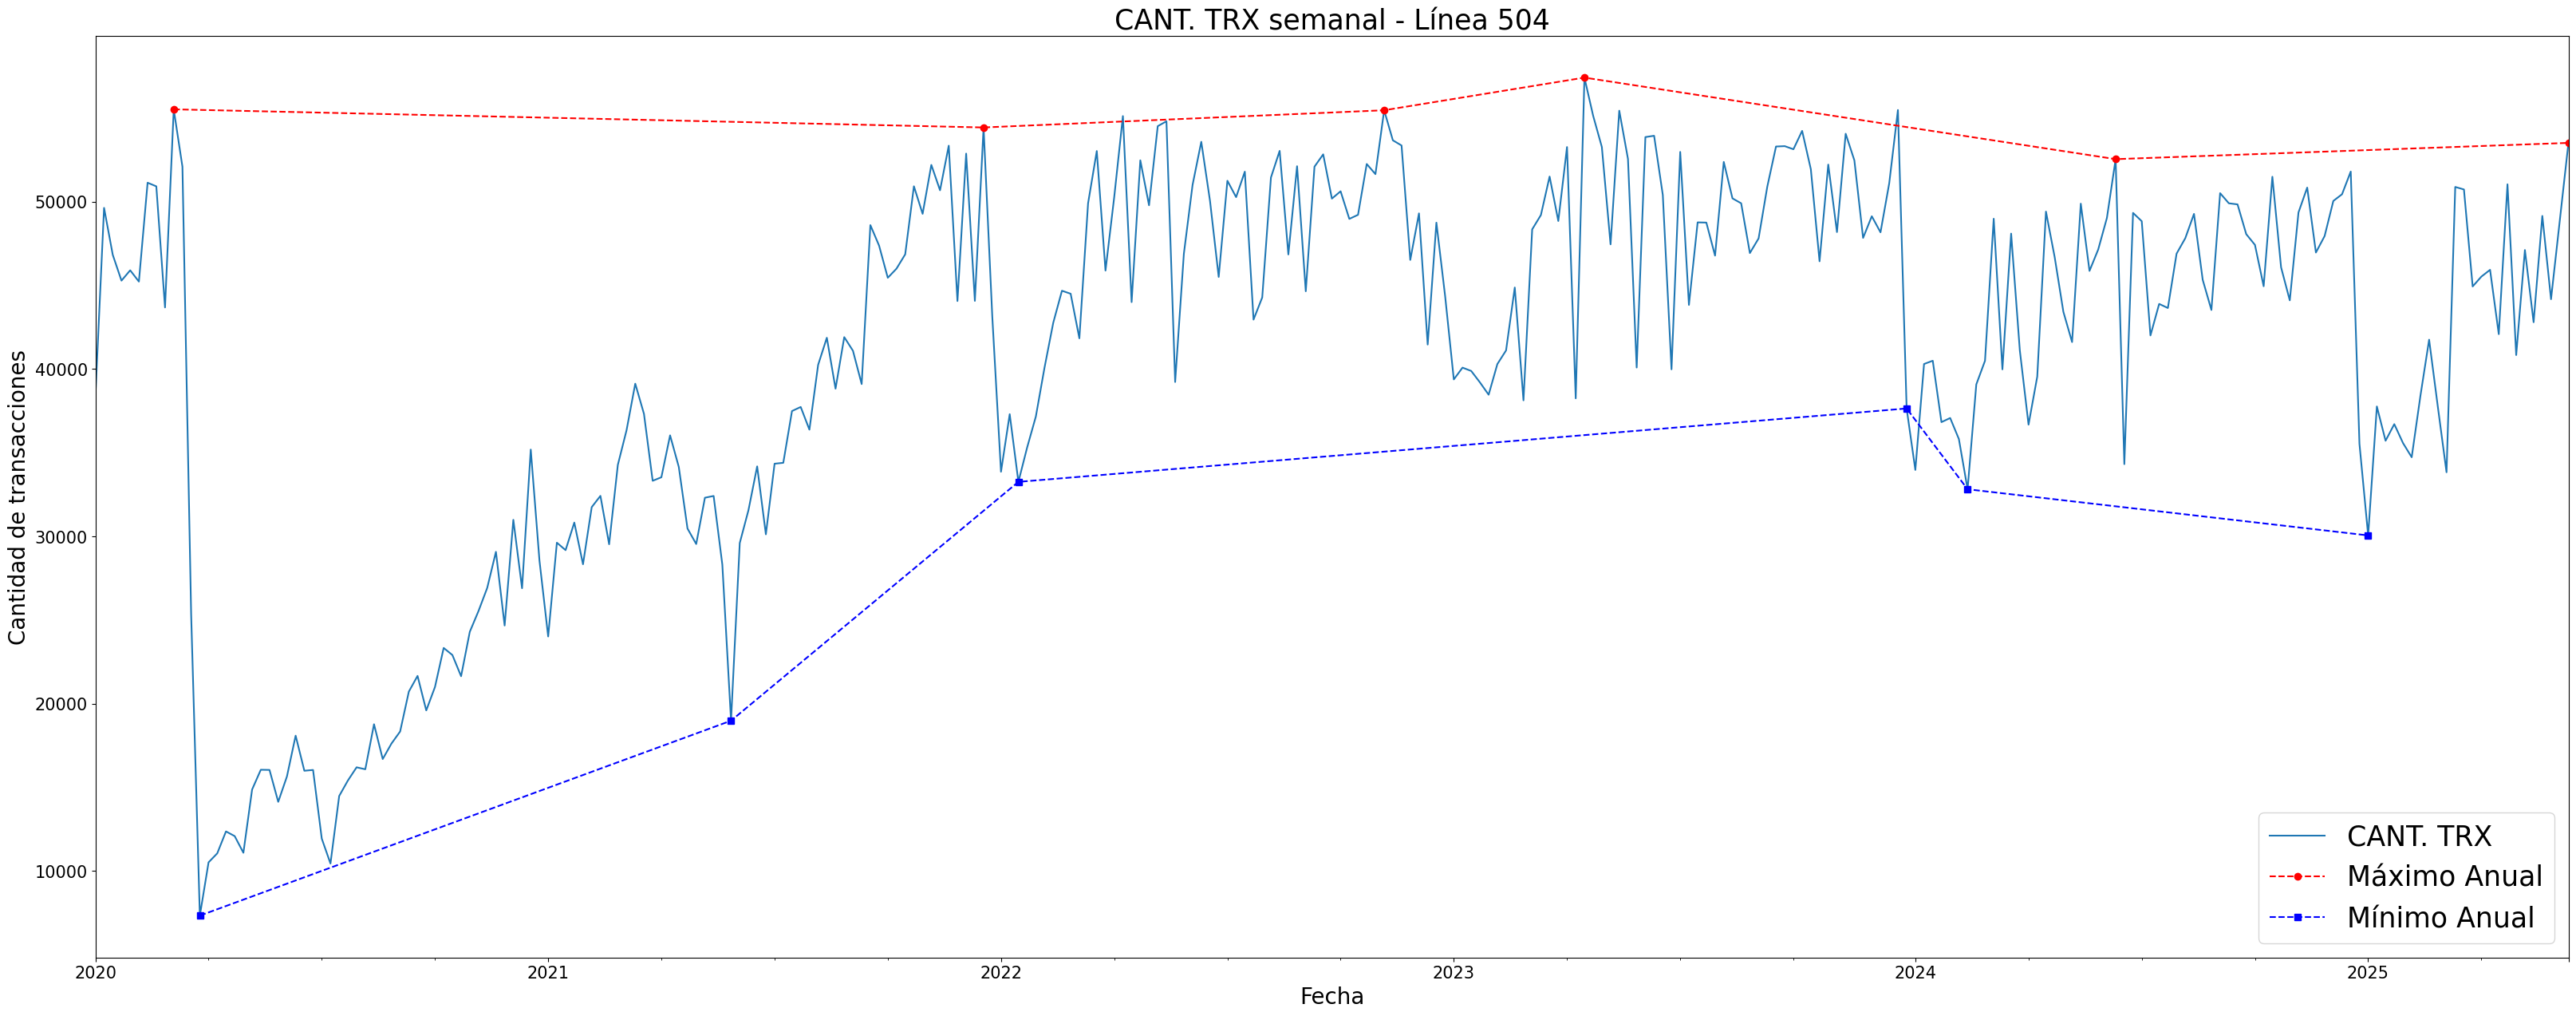

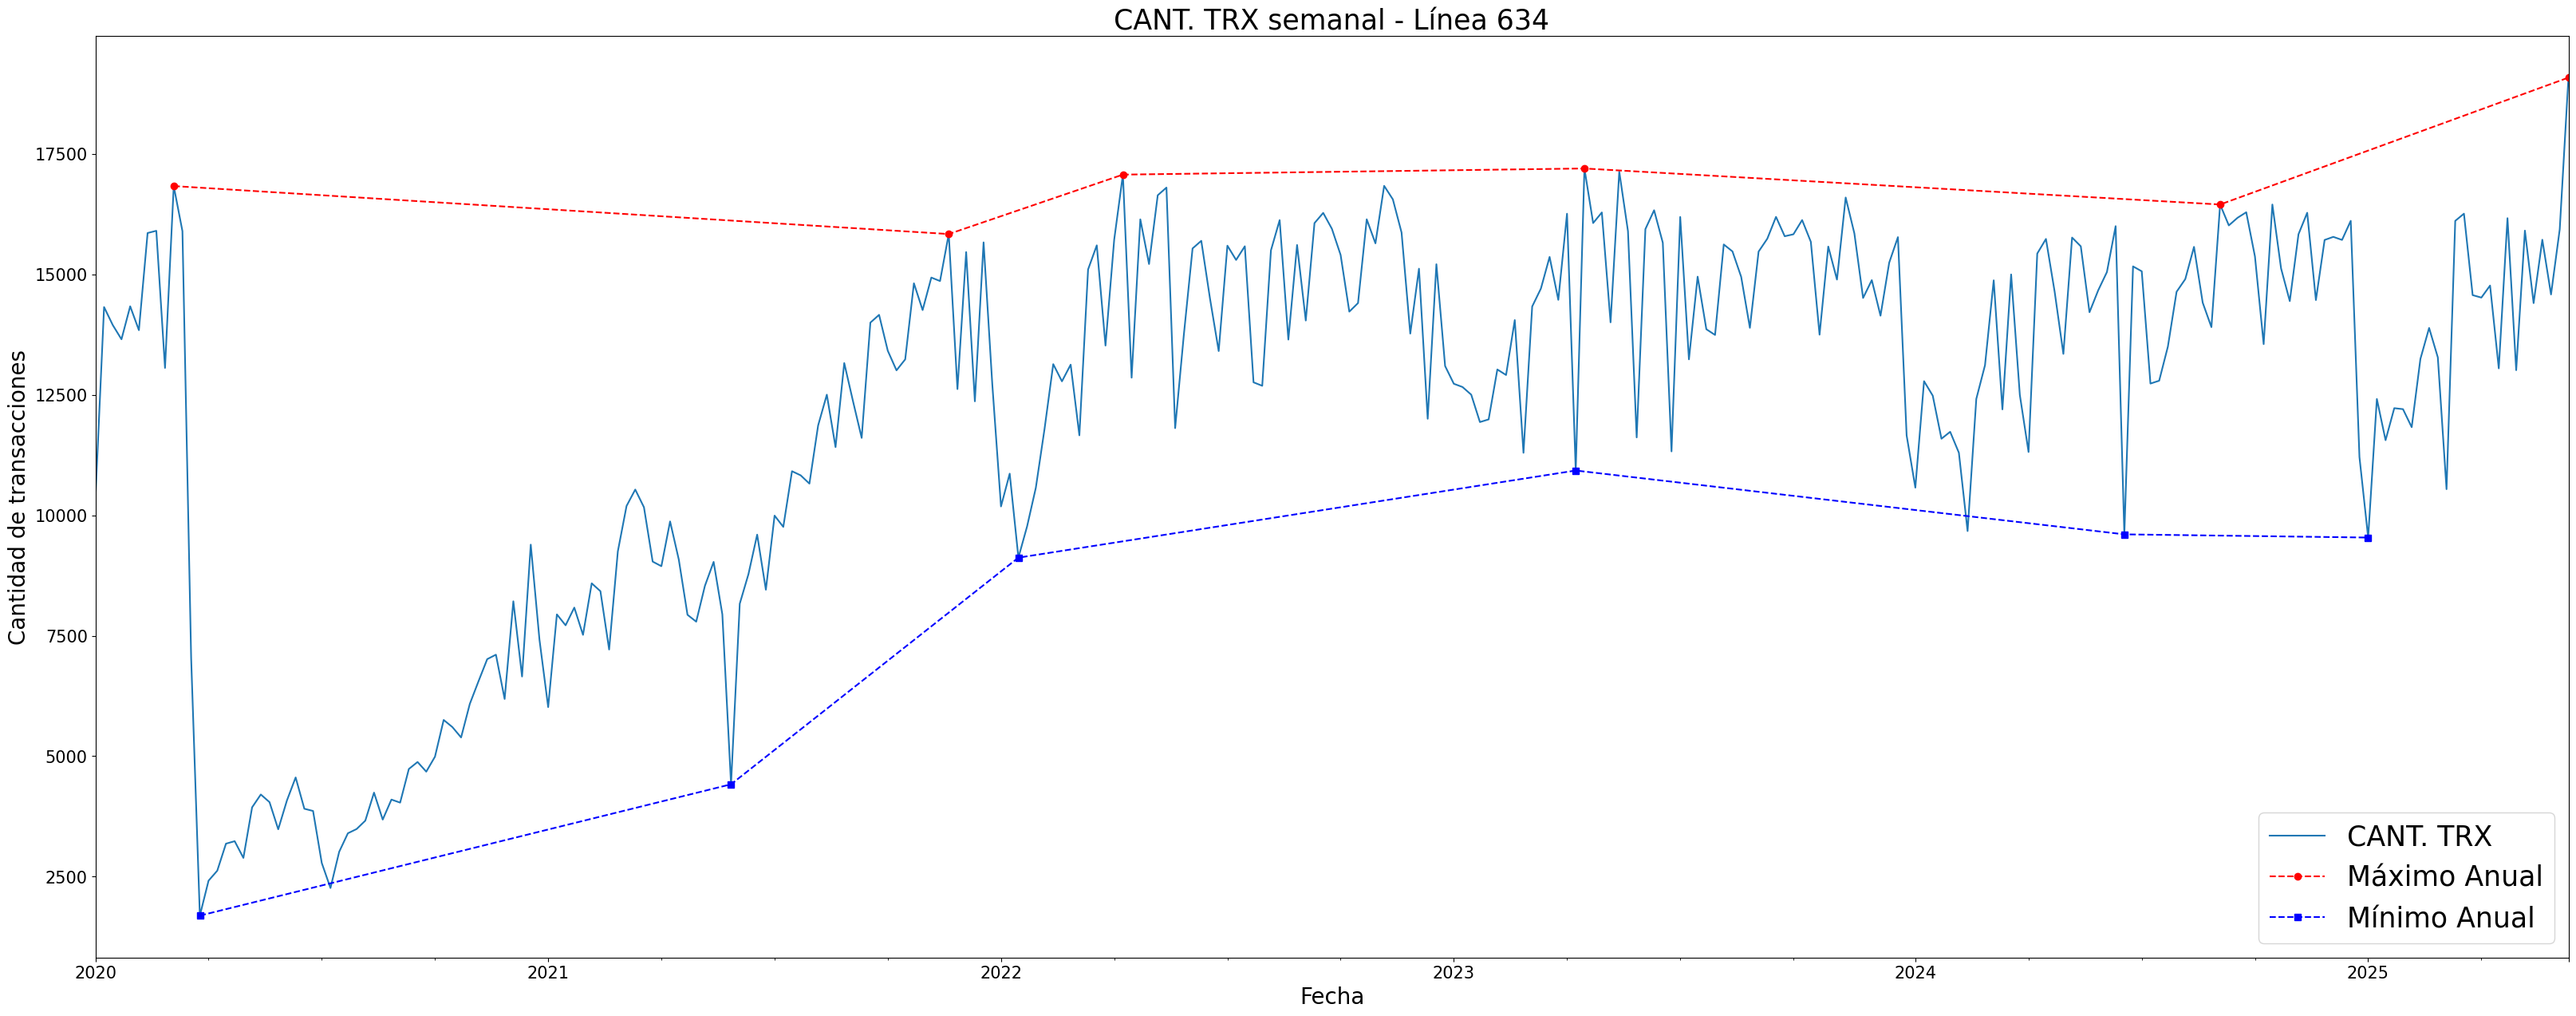

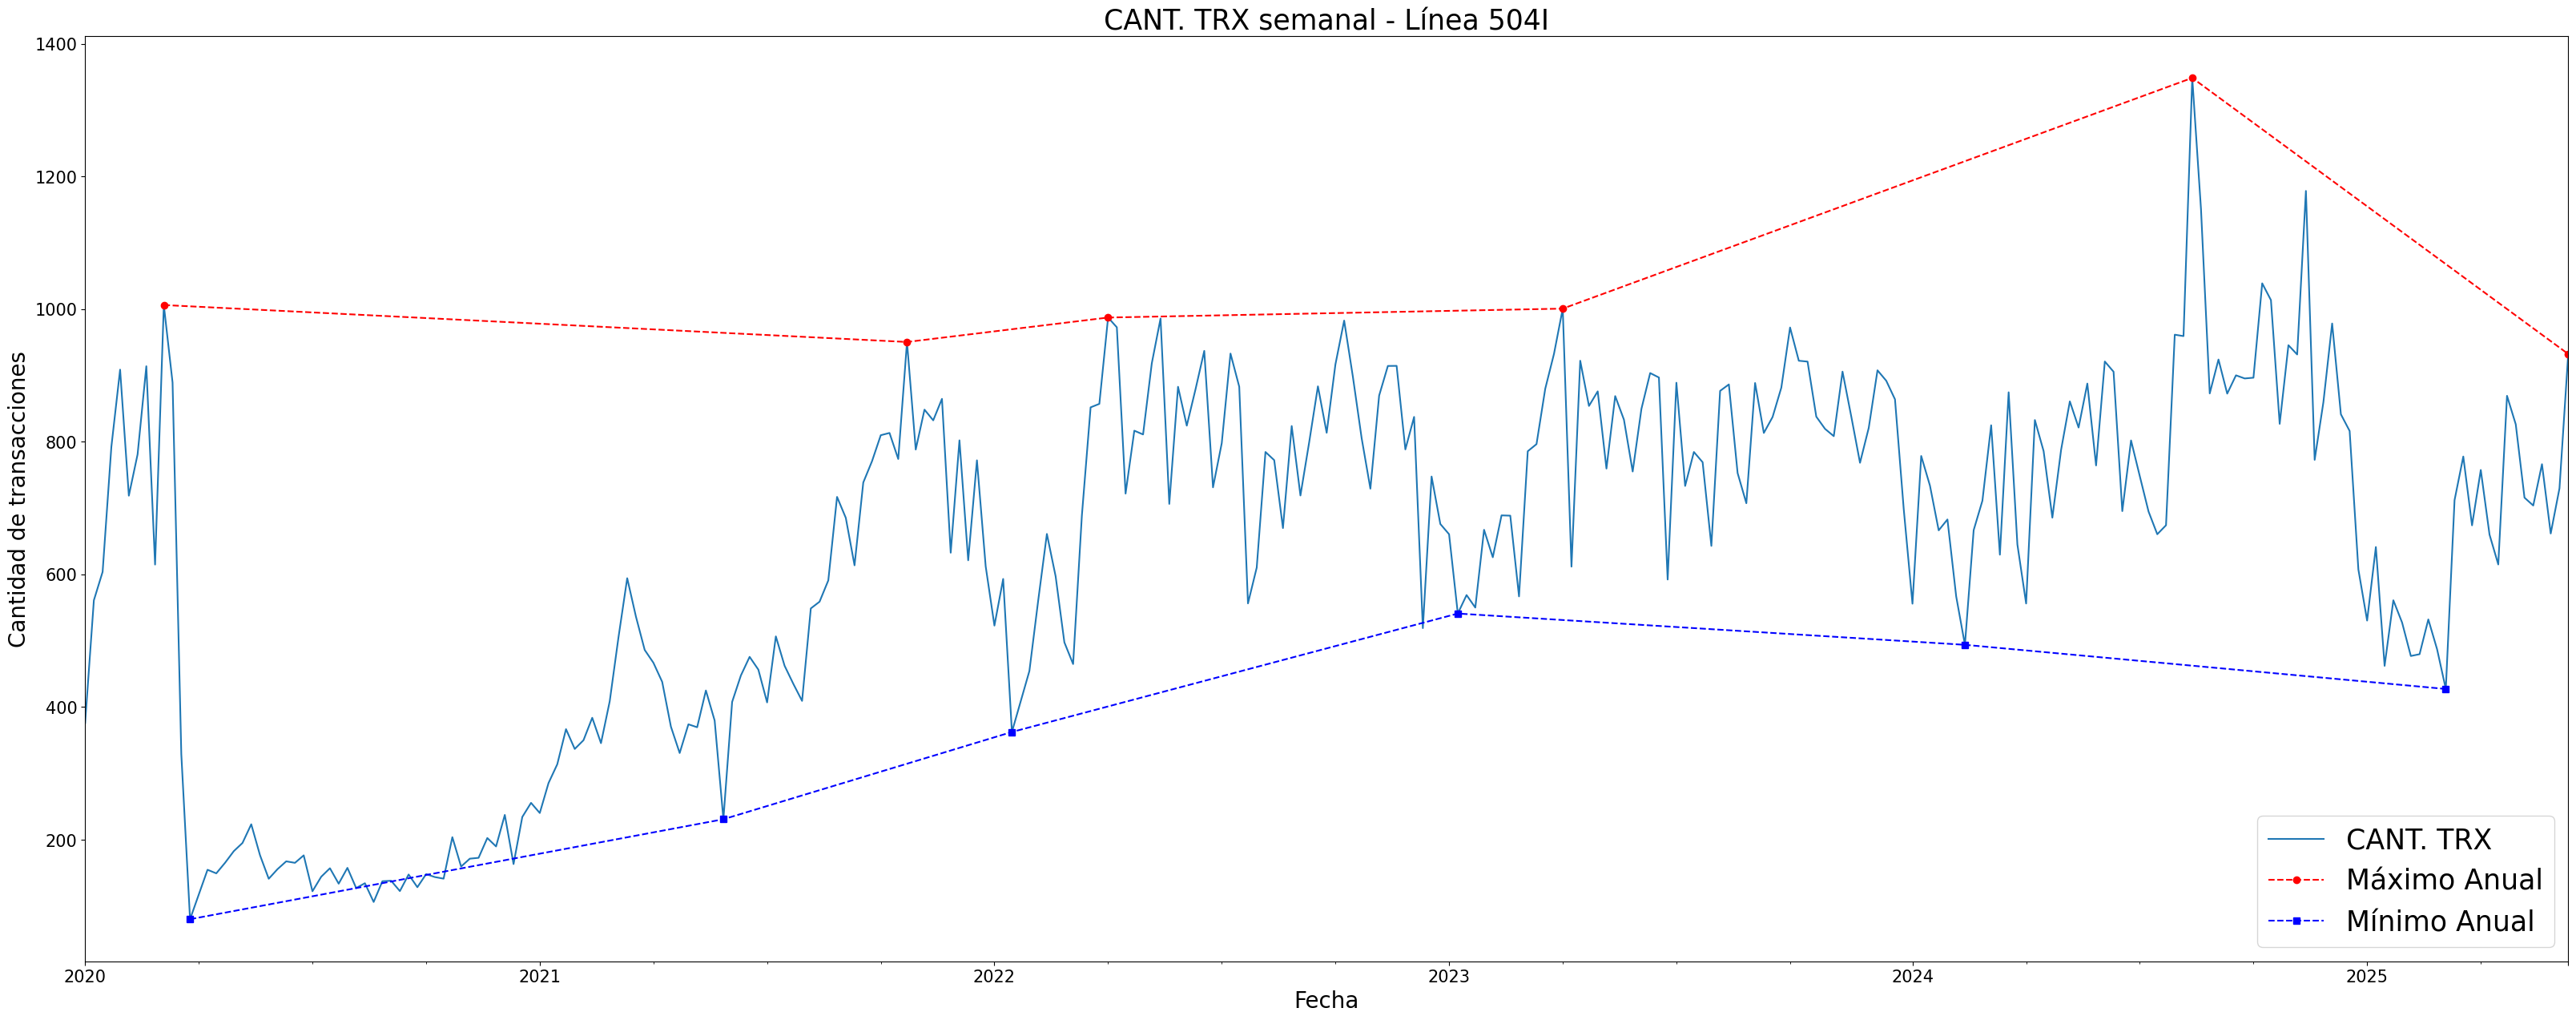

In [85]:
for df_linea in df_lista:
    fig, ax = plt.subplots(figsize=(40, 15))

    df_new = df_linea['CANT. TRX'].resample(rule='W').mean()
    df_new.plot(ax=ax)
    
    # Calcular extremos anuales
    # Agrupar por año y obtener fechas exactas del máximo y mínimo
    max_dates = df_new.groupby(df_new.index.year).idxmax()
    min_dates = df_new.groupby(df_new.index.year).idxmin()

    # Obtener los valores en esas fechas
    max_vals = df_new.loc[max_dates]
    min_vals = df_new.loc[min_dates]

    # Superponer en el mismo gráfico
    max_vals.plot(ax=ax, style='o--', label='Máximo Anual', color='red')
    min_vals.plot(ax=ax, style='s--', label='Mínimo Anual', color='blue')

    ax.set_title(f"CANT. TRX semanal - Línea {df_linea['LINEA'].iloc[0]}", fontsize=25)
    ax.set_xlabel("Fecha", fontsize=20)
    ax.set_ylabel("Cantidad de transacciones", fontsize=20)

    # Tamaño de ticks en los ejes
    ax.tick_params(axis='both', labelsize=15)

    # Mostrar la leyenda
    ax.legend(loc='lower right', fontsize=25)
    plt.show()

Como se puede observar en todas las líneas hay un patrón claro entre el año 2020 y 2021, esto se puede interpretar que está directamente relacionado con el inicio de la pandemia y las restricciones de movilidad debido a la cuarentena. Por lo tanto, sería pertinente a la hora de entrenar modelos con estas series de tiempo el exclluir estos años y considerar a partir del 2022.

## **Análisis y transformación de datos**

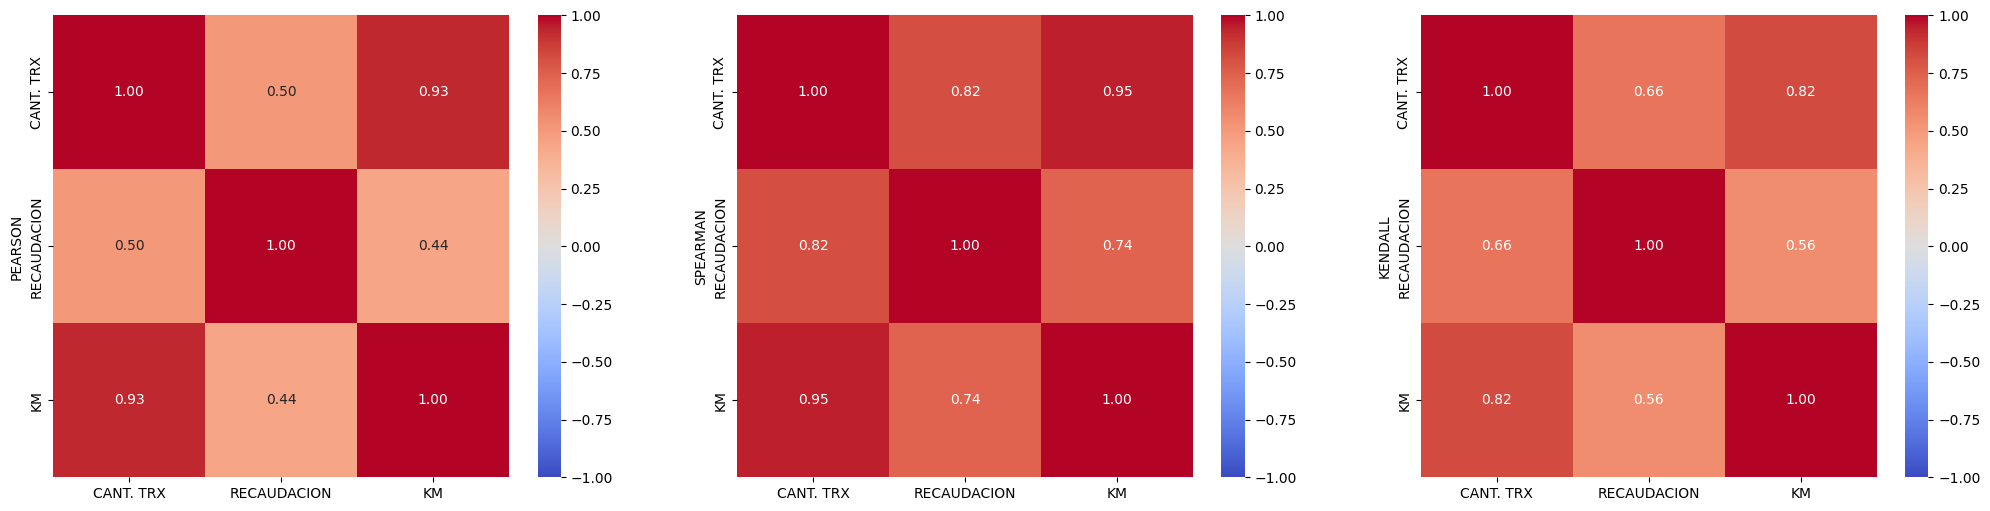

In [86]:
plt.figure(figsize=(25,6))

plt.subplot(1, 3, 1)
sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1)
plt.ylabel('PEARSON')

plt.subplot(1, 3, 2)
sns.heatmap(
    df.corr(method='spearman', numeric_only=True),
    annot=True, 
    fmt=".2f",  
    cmap="coolwarm",  
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('SPEARMAN')

plt.subplot(1, 3, 3)
sns.heatmap(
    df.corr(method='kendall', numeric_only=True), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm",
    center=0, 
    vmin=-1, 
    vmax=1,)
plt.ylabel('KENDALL')

plt.show()

Como parte del análisis de los features podemos observar que hay una relación lineal muy fuerte entre CANT. TRX y KM, aunque por el lado de la RECAUDACION no hay una relación lineal tan fuerte como en las anteriores. Esto último puede deberse a que la recaudación no está ajustada por inflación, pudiendo darse situaciones en que la recaudación es mayor pero la cantidad de transacciones y los kilómetros es mucho menor.

### **Prueba de estacionaridad, ACF y PACF**

In [87]:
def analizar_estacionaridad(df, columna='CANT. TRX', max_d=3, linea_id='Desconocida'):
    """
    Aplica diferenciaciones sucesivas hasta lograr estacionaridad.
    Devuelve el valor mínimo de d necesario y muestra gráficos de ACF y PACF.
    """
    serie = df[columna].dropna().copy()
    d = 0
    resultado_adf = adfuller(serie)

    print(f"\nLínea {linea_id}")
    print(f"    Estadístico ADF: {resultado_adf[0]}")
    print(f"    Valor p: {resultado_adf[1]}")
    print(f"    Críticos:")
    for key, value in resultado_adf[4].items():
        print(f"      {key}: {value}")

    while resultado_adf[1] > 0.05 and d < max_d:
        d += 1
        serie = serie.diff().dropna()
        resultado_adf = adfuller(serie)

    print(f"Diferenciaciones necesarias: {d}")
    print(f"    Estadístico ADF: {resultado_adf[0]:.4f}")
    print(f"    Valor p: {resultado_adf[1]:.4f}")

    # Graficar serie diferenciada
    plt.figure(figsize=(14, 6))
    sns.lineplot(x=serie.index, y=serie, linewidth=1)
    plt.title(f'Serie diferenciada (d={d}) - Línea {linea_id}')
    plt.xlabel("Fecha")
    plt.ylabel("Transacciones diferenciadas")
    plt.grid(True)
    plt.show()

    # Graficar ACF y PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(serie, lags=30, ax=axes[0])
    axes[0].set_title(f'ACF - Línea {linea_id} (d={d})')
    plot_pacf(serie, lags=30, ax=axes[1])
    axes[1].set_title(f'PACF - Línea {linea_id} (d={d})')
    plt.tight_layout()
    plt.show()

    return d



Línea 166
    Estadístico ADF: -2.6710770826385914
    Valor p: 0.07917830661231451
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -13.6423
    Valor p: 0.0000


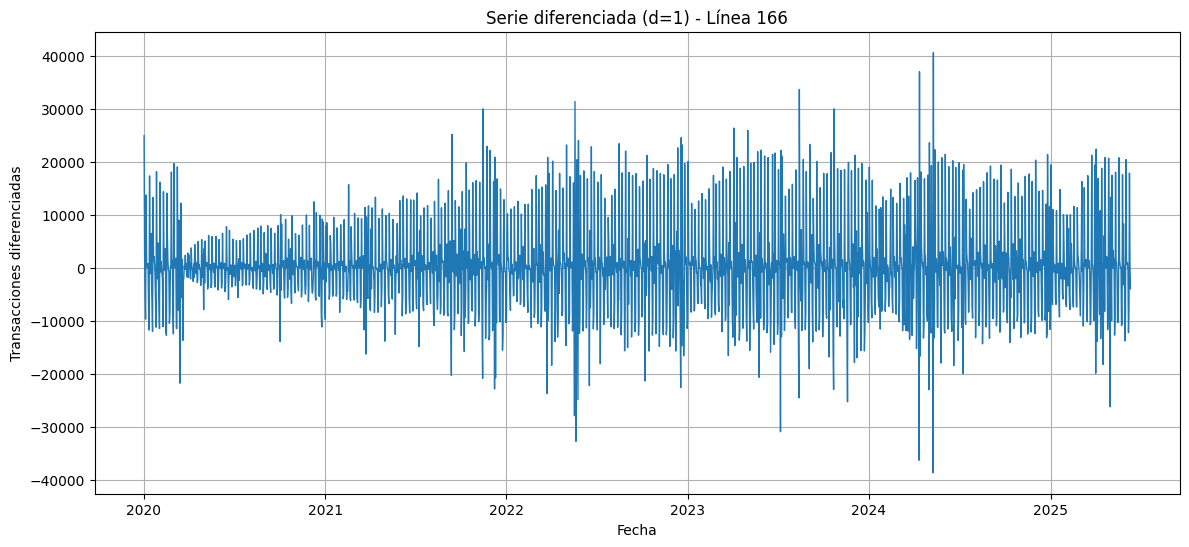

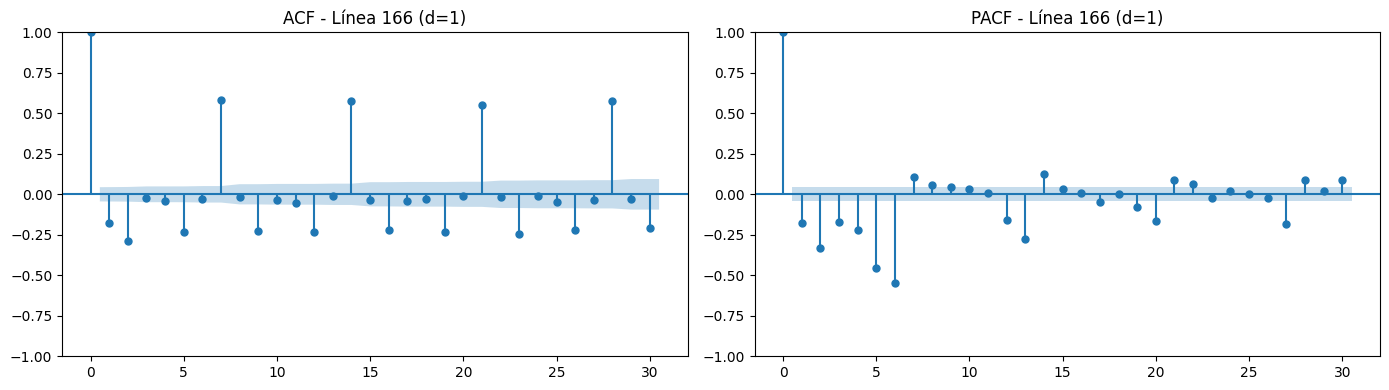


Línea 236
    Estadístico ADF: -2.5690192439238806
    Valor p: 0.0995708908027722
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -14.4247
    Valor p: 0.0000


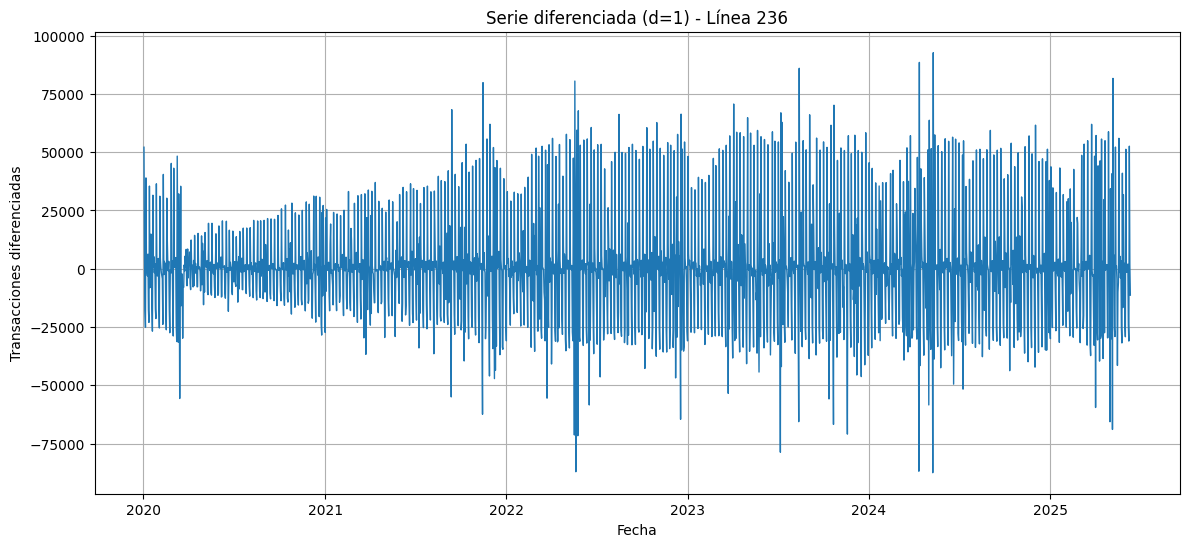

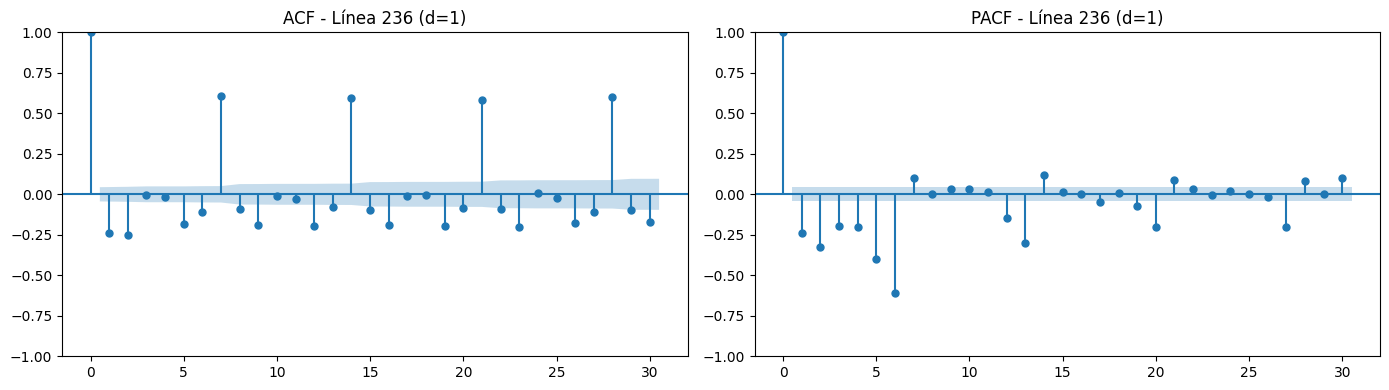


Línea 269
    Estadístico ADF: -2.650185419478021
    Valor p: 0.08306208176558838
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -14.4996
    Valor p: 0.0000


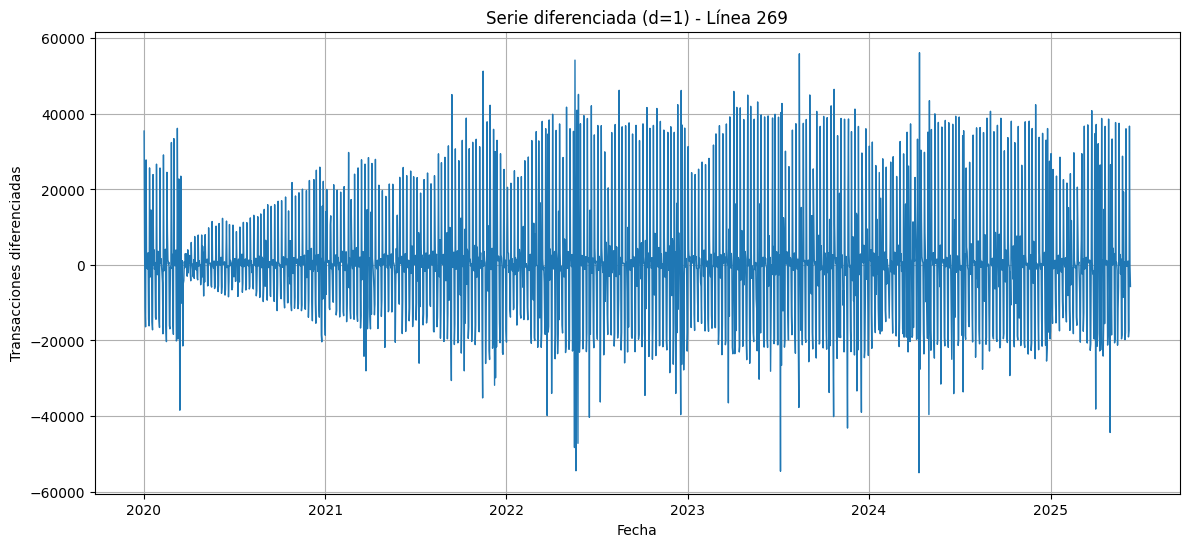

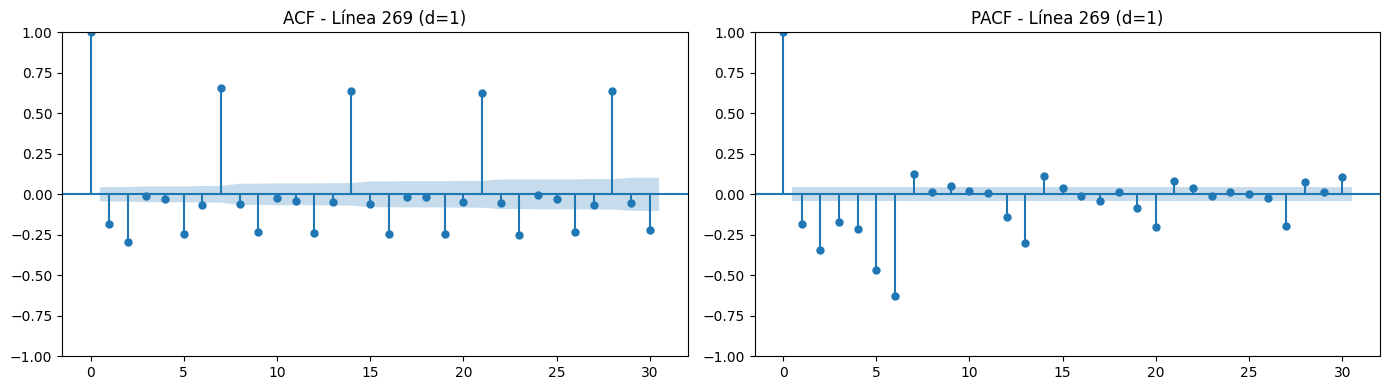


Línea 395
    Estadístico ADF: -2.8337004101038876
    Valor p: 0.05361881284678509
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -13.9711
    Valor p: 0.0000


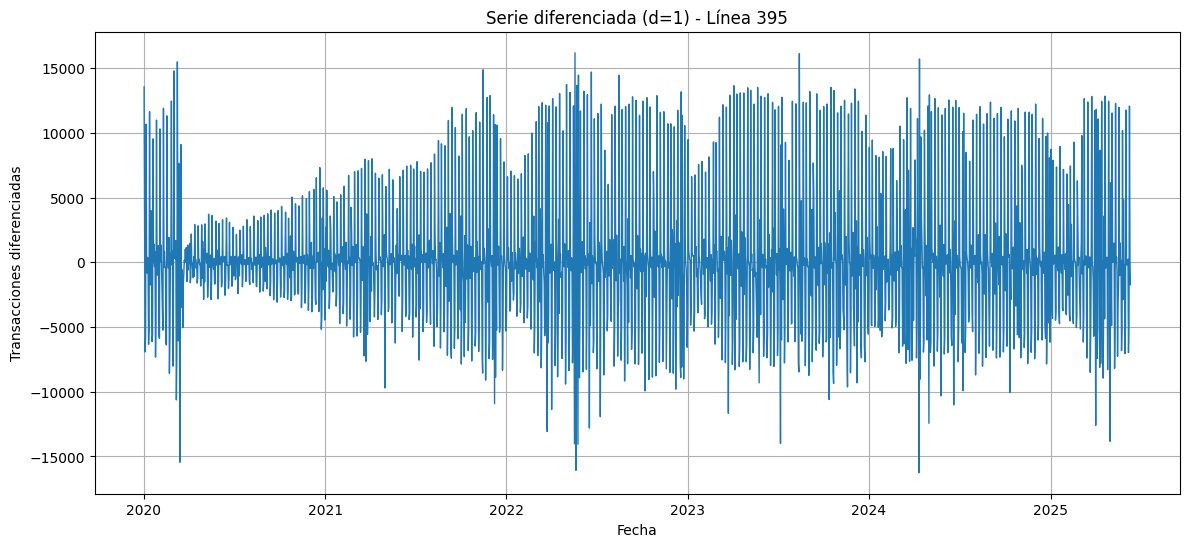

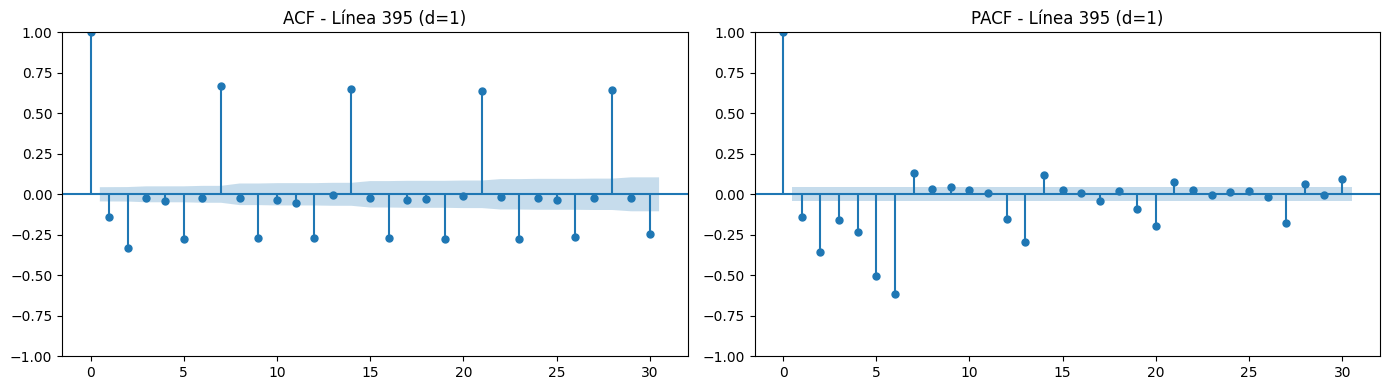


Línea 441
    Estadístico ADF: -2.6319634789086455
    Valor p: 0.08656935450032438
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -13.8047
    Valor p: 0.0000


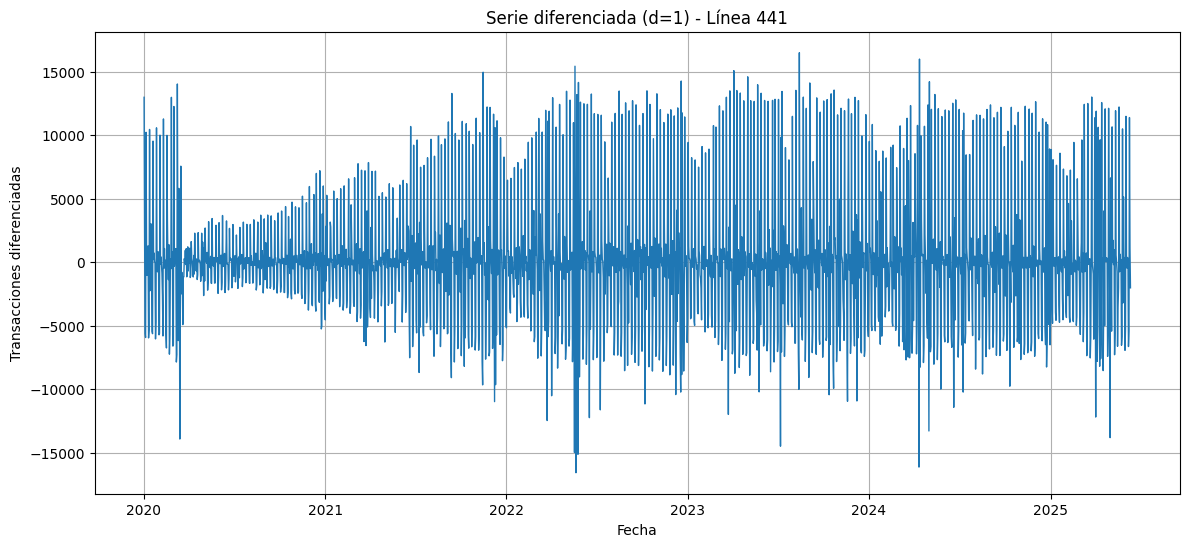

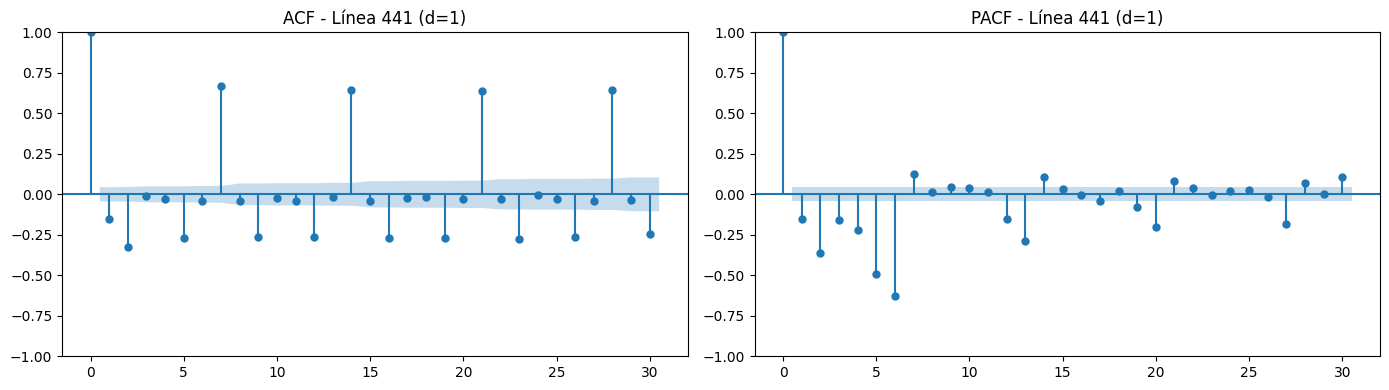


Línea 443
    Estadístico ADF: -1.9981675667586138
    Valor p: 0.28737713484072036
    Críticos:
      1%: -3.4336873477015715
      5%: -2.8630142448539964
      10%: -2.567554827575099
Diferenciaciones necesarias: 1
    Estadístico ADF: -13.4880
    Valor p: 0.0000


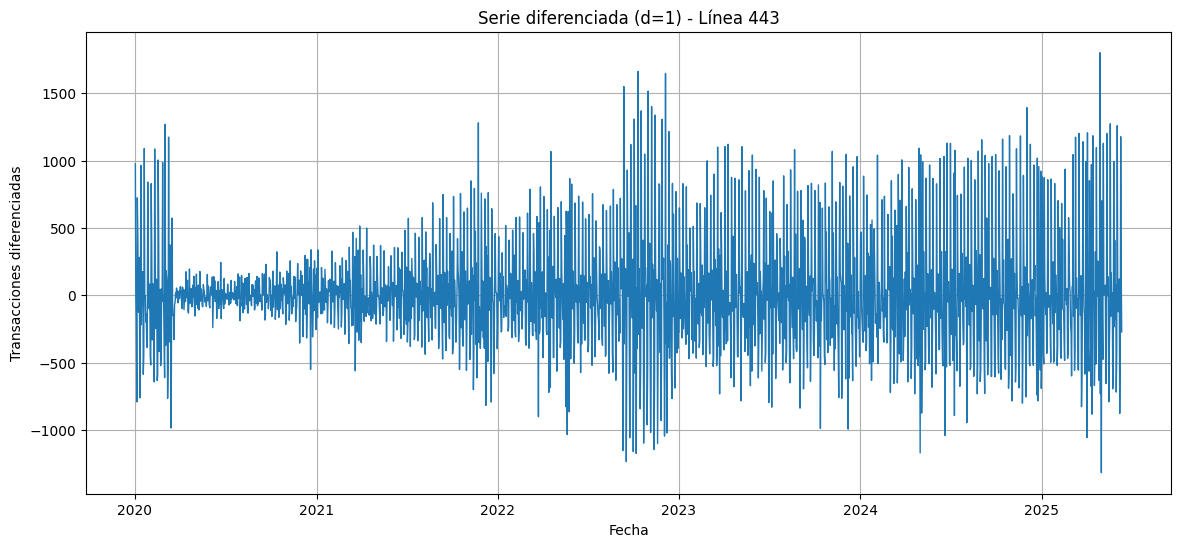

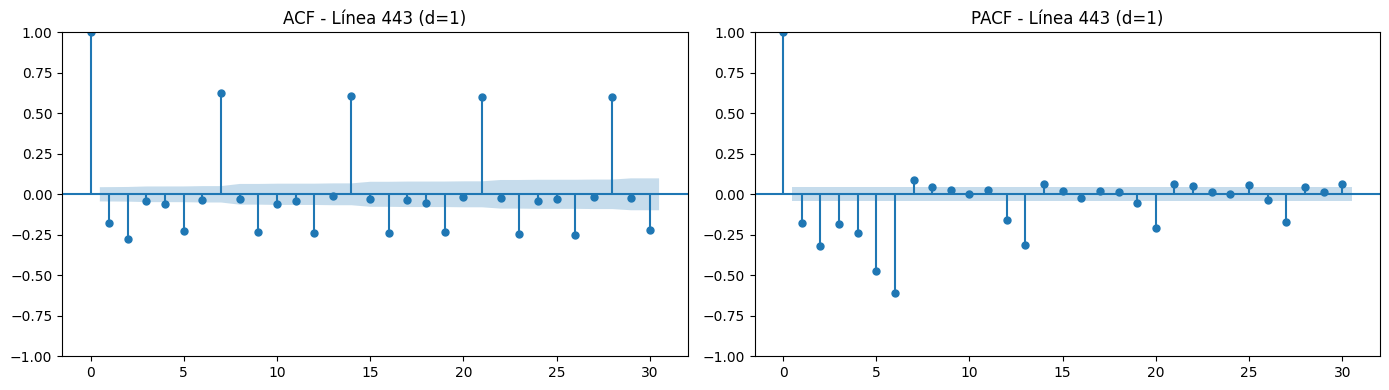


Línea 504
    Estadístico ADF: -2.585163071587368
    Valor p: 0.09610269587020748
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -14.5136
    Valor p: 0.0000


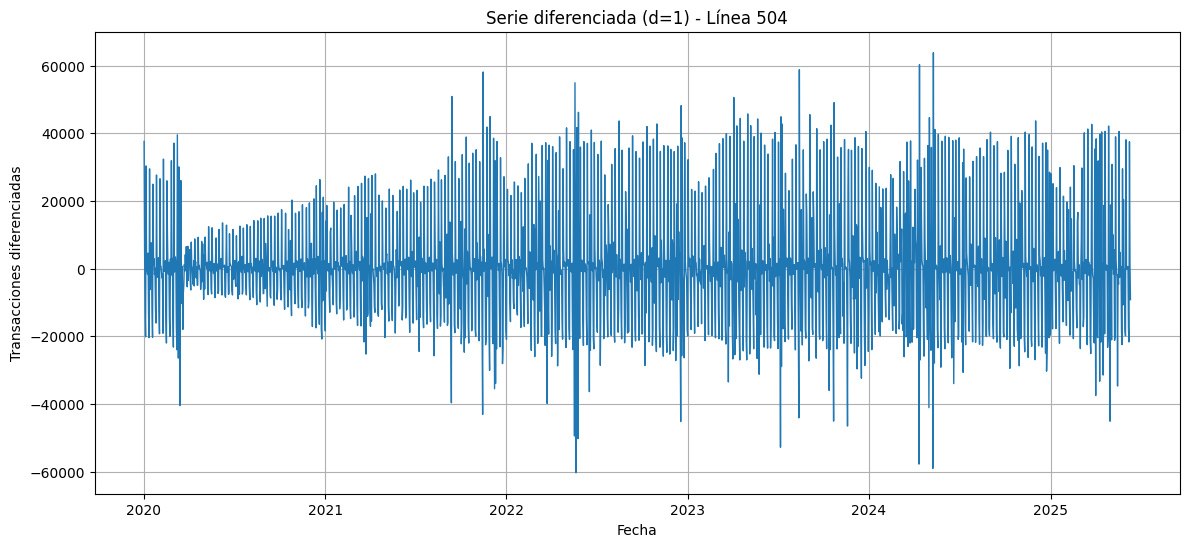

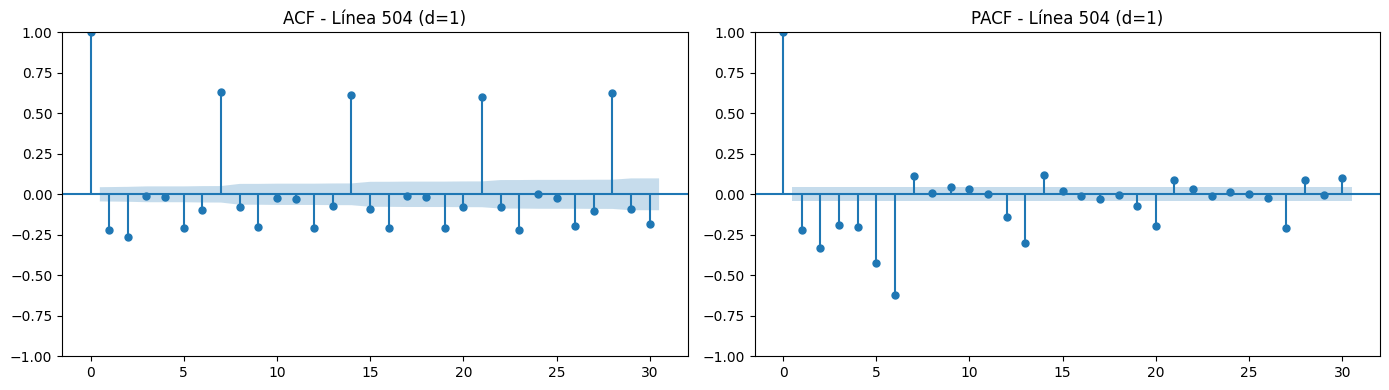


Línea 634
    Estadístico ADF: -2.2346252987095934
    Valor p: 0.19391927231959571
    Críticos:
      1%: -3.4336788532475775
      5%: -2.8630104945933974
      10%: -2.567552830738709
Diferenciaciones necesarias: 1
    Estadístico ADF: -14.5573
    Valor p: 0.0000


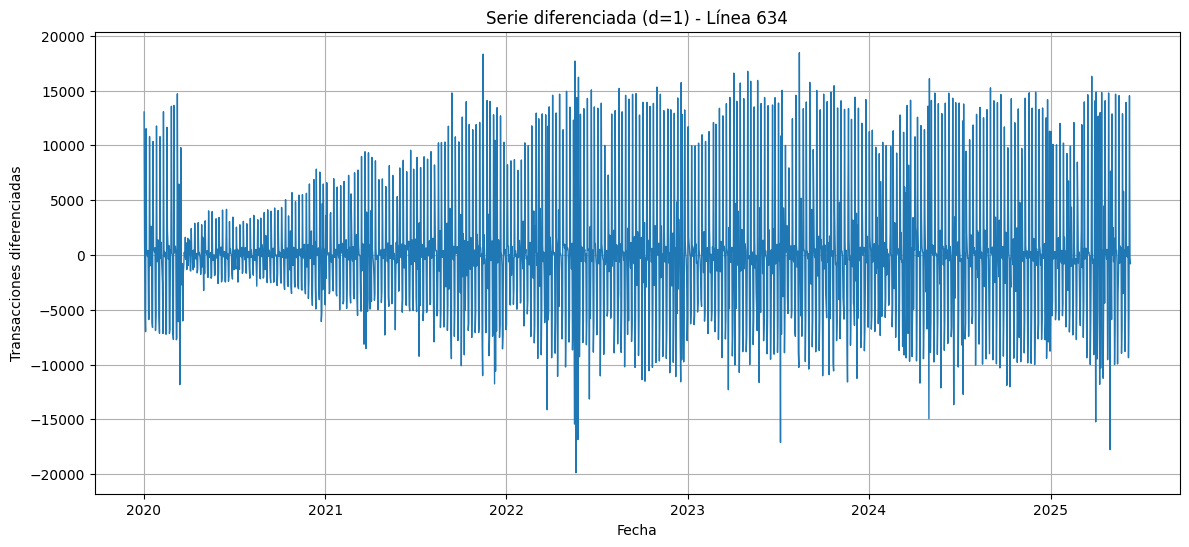

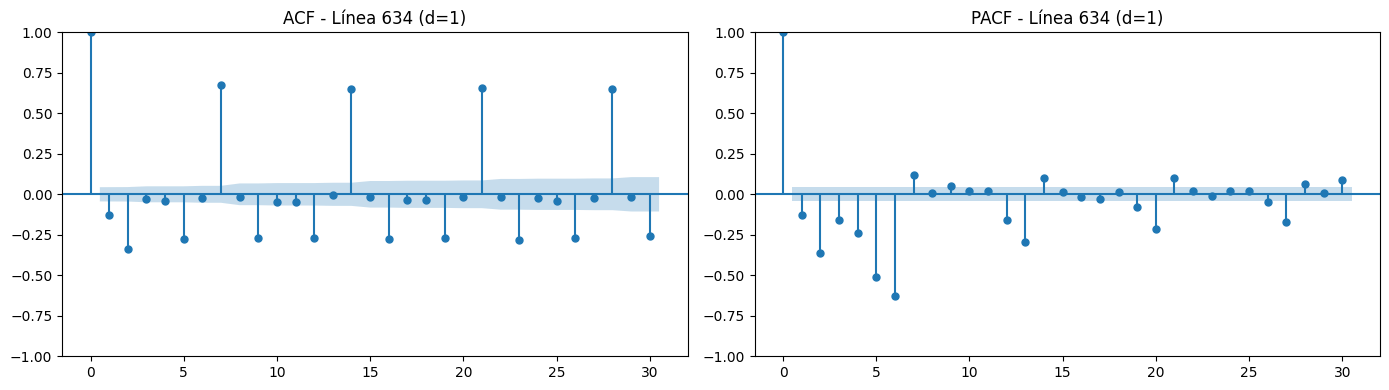


Línea 504I
    Estadístico ADF: -2.6272682439282833
    Valor p: 0.08749141250459419
    Críticos:
      1%: -3.4336805486772994
      5%: -2.863011243118318
      10%: -2.567553229292686
Diferenciaciones necesarias: 1
    Estadístico ADF: -13.6266
    Valor p: 0.0000


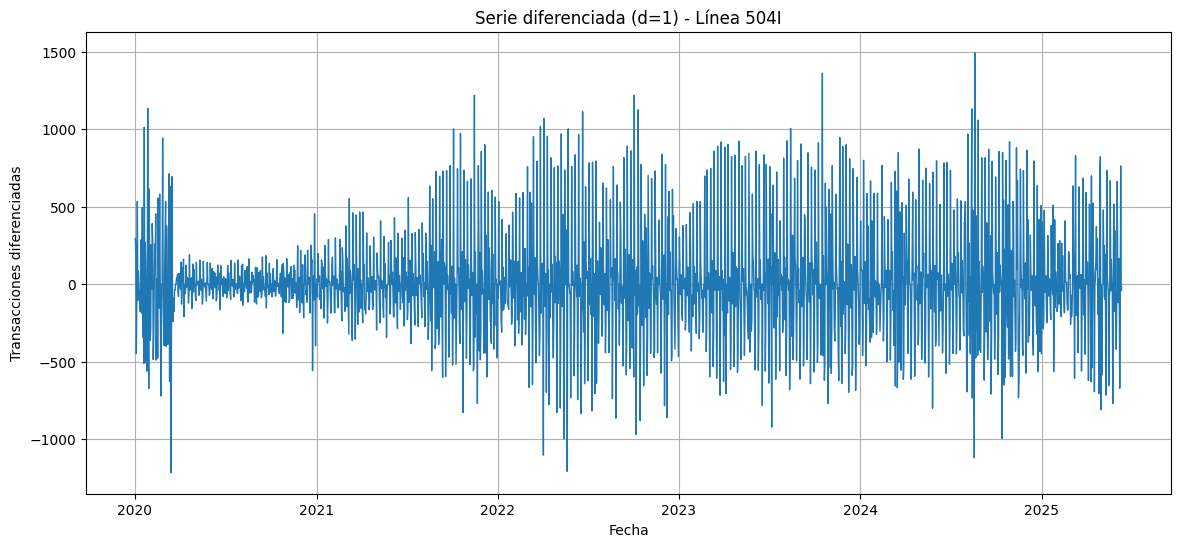

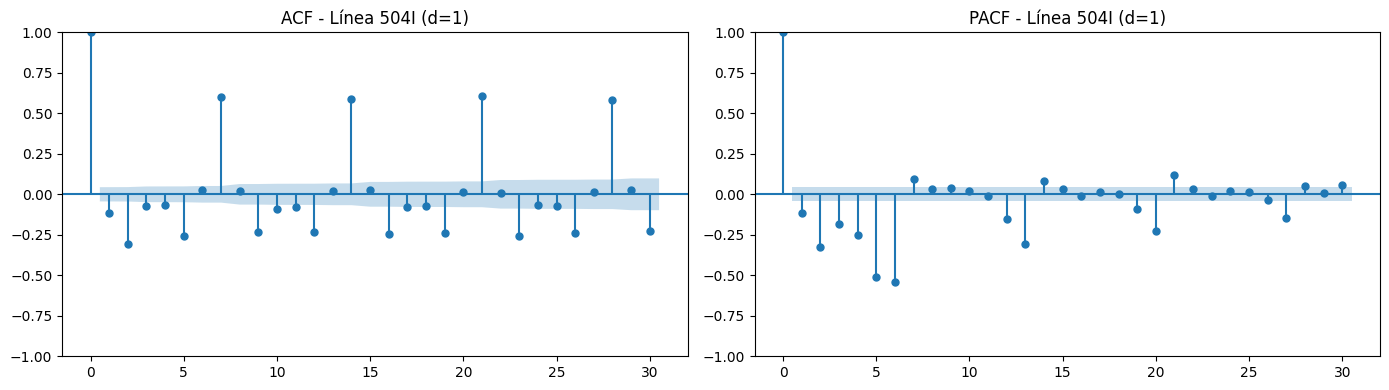

In [88]:
valores_d = {}

for df_linea in df_lista:
    linea = df_linea['LINEA'].iloc[0]
    d = analizar_estacionaridad(df_linea, columna='CANT. TRX', linea_id=linea)
    valores_d[linea] = d

#### **Conclusiones**

A partir de los resultados obtenidos de la ejecución anterior se pueden obtener varias conclusiones.

#### **Test de Dickey-Fuller Aumentado (ADF)**

Por el test ADF podemos decir que ninguna de las series pasa el test al 5% de significancia (valor p > 0.05), lo cual sugiere que:

- Todas las series probablemente no son estacionarias en su forma original.

- Las más cercanas al umbral son:

    - Línea 395: valor p ≈ 0.053 → casi estacionaria.

    - Líneas 166, 269, 504I: valor p entre 0.07–0.09 → no estacionarias, pero cerca.

#### **ACF**

En todas las líneas podemos ver lo siguiente:

- Hay picos significativos en los lags 7, 14, 21 y 28 (múltiplos de 7).

- Esto sugiere una componente estacional semanal (probablemente los días de la semana afectan el patrón de transacciones, como ya habíamos sospechado en el EDA previo).

- No se observa un corte brusco inmediato (como en lag 1 o 2), lo que indica que no es una MA pura de bajo orden.

#### **PACF**

En todas las líneas podemos ver lo siguiente:

- Se observa un corte claro y significativo hasta el lag 6, con varios valores por debajo del umbral de confianza.

- Después de eso, los valores se estabilizan alrededor de cero y quedan dentro de las bandas de confianza.

#### **Conclusiones finales**

- Dado que la ACF muestra estacionalidad a lag 7, se podría utilizar un modelo SARIMA, que incorpora componentes estacionales.

- En términos de q (parte MA), no hay un corte claro inmediato, así que un q bajo (por ejemplo 1 o 2) puede ser un punto de partida.

- Dado que la PACF muestra un corte claro y significativo hasta el lag 6, un modelo AR (autoregresivo) de orden p = 6 podría capturar bien la estructura autoregresiva del proceso.

### **Separación entre datos de entrenamiento y prueba**

In [89]:
train_test_lineas = {}
for df_linea in df_lista:
    start_date = datetime.datetime(2022, 1, 1)

    df_linea_new = df_linea['CANT. TRX']
    
    # Ordenar por fecha
    df_linea_new = df_linea_new[df_linea_new.index >= start_date].sort_index()

    # Obtener fecha de corte (80%)
    # Convertir fechas a enteros para usar quantile, luego volver a datetime
    fechas_numeric = df_linea_new.index.view('int64')
    fecha_corte_ts = pd.Series(fechas_numeric).quantile(0.8)
    fecha_corte = pd.to_datetime(fecha_corte_ts)

    # Dividir el DataFrame
    df_train = df_linea_new[df_linea_new.index <= fecha_corte]  # 80%
    df_test = df_linea_new[df_linea_new.index > fecha_corte]   # 20%

    train_test_lineas[df_linea['LINEA'].iloc[0]] = (df_train, df_test, df_linea, start_date, fecha_corte)

## **SARIMA**

Evaluamos SARIMA con parámetro q en 1 y en 3, para la línea 166 para simplificar la cantidad de gráficos mostrados (aunque es posible hacerlo para todas). 

In [90]:
def train_sarimax(q):
    # Entrenar SARIMA solo sobre entrenamiento
    model = SARIMAX(train,
                    order=(6, 1, q),
                    seasonal_order=(1, 1, 1, 7),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    results = model.fit(disp=False)

    # Hacer predicción sobre el período de test
    pred = results.get_prediction(start=test.index[0], end=test.index[-1])
    pred_mean = pred.predicted_mean

    # Este intervalo indica la incertidumbre del modelo. 
    # En otras palabras, hay un 95% de probabilidad (valor por defecto) de que el valor real esté dentro de ese rango.
    pred_ci = pred.conf_int()

    # Métricas de error
    mae = mean_absolute_error(test, pred_mean)
    rmse = np.sqrt(mean_squared_error(test, pred_mean))
    print(f"   MAE: {mae:.2f} | RMSE: {rmse:.2f}")

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(train[-30:], label='Entrenamiento (últimos 30 días)', color='blue')
    plt.plot(test, label='Observado (Test)', color='black')
    plt.plot(pred_mean, label='Pronóstico', color='orange')
    plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='orange', alpha=0.2)
    plt.title(f"Pronóstico SARIMA - Línea {linea}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de transacciones")
    plt.legend()
    plt.tight_layout()
    plt.show()

### **SARIMA(6,1,1)(1,1,1,7)**


Línea 166 - Entrenamiento SARIMA(6,1,1)(1,1,1,7)


/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


   MAE: 4833.37 | RMSE: 7230.69


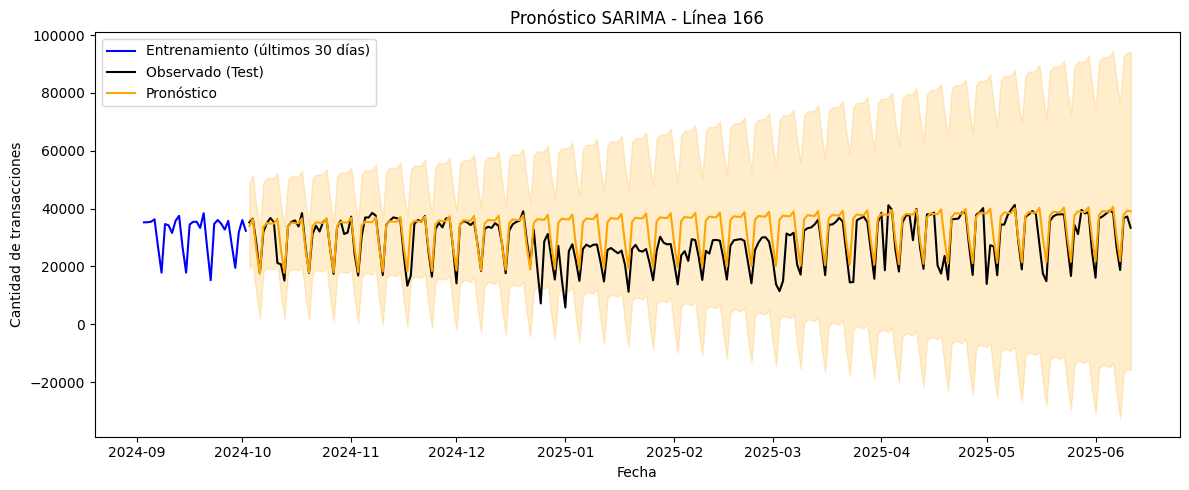

In [91]:
for linea, (train, test, _, _, _) in train_test_lineas.items():
    print(f"\nLínea {linea} - Entrenamiento SARIMA(6,1,1)(1,1,1,7)")
    train_sarimax(q=1)
    # Comentar para mostrar todas las líneas
    break

### **SARIMA(6,1,3)(1,1,1,7)**


Línea 166 - Entrenamiento SARIMA(6,1,3)(1,1,1,7)


/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


   MAE: 3965.84 | RMSE: 5997.25


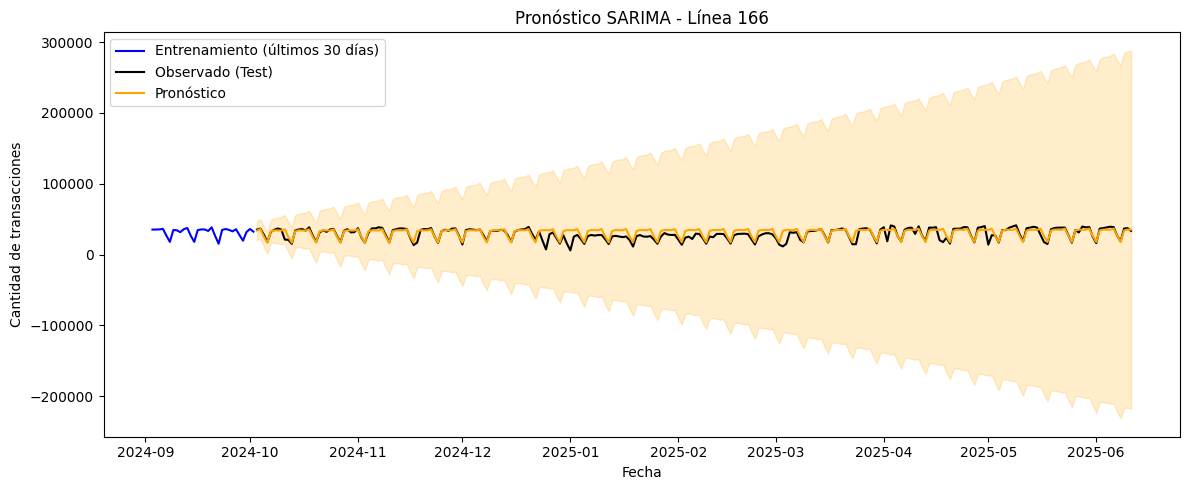

In [92]:
for linea, (train, test,_,_,_) in train_test_lineas.items():
    print(f"\nLínea {linea} - Entrenamiento SARIMA(6,1,3)(1,1,1,7)")

    train_sarimax(q=3)
    # Comentar para mostrar todas las líneas
    break

Tanto en los gráficos como analizando el MAE y el RMSE se ve claramente que al aplicar un valor q de 3 se mejora la predicción.

## **VARMA**

Dado que tenemos dos variables dependientes interrelacionadas (CANT. TRX y KM), podría resultar interesante probar el uso de un modelo VARMA, con los parámetros p y q encontrados en nuestro análisis de estacionaridad.

In [93]:
df_transformed = train_test_lineas['166'][2][['CANT. TRX', 'KM']].diff()
df_transformed.head()

CANT. TRX        KM
FECHA                          
2020-01-01        NaN       NaN
2020-01-02    25014.0  7204.311
2020-01-03     3072.0   310.999
2020-01-04    -5475.0   962.998
2020-01-05    -9641.0 -4588.635

In [94]:
df_transformed_new = df_transformed[df_transformed.index >= train_test_lineas['166'][3]].sort_index()

df_train = df_transformed_new[df_transformed_new.index <= train_test_lineas['166'][4]]  # 80%
df_test = df_transformed_new[df_transformed_new.index > train_test_lineas['166'][4]]   # 20%
df_train.shape, df_test.shape

((1006, 2), (252, 2))

In [95]:
model = VARMAX(df_train, order=(6,1))
results = model.fit(maxiter=1000, disp=False)
results.summary()

/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alejandronicolastacchella/Documents/Personal/Maestría IA/AST/ceia_ast_tps/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:     ['CANT. TRX', 'KM']   No. Observations:                 1006
Model:                      VARMA(6,1)   Log Likelihood              -18580.481
                           + intercept   AIC                          37226.961
Date:                 Mon, 16 Jun 2025   BIC                          37389.114
Time:                         10:30:45   HQIC                         37288.573
Sample:                     01-01-2022                                         
                          - 10-02-2024                                         
Covariance Type:                   opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.00, 0.00   Jarque-Bera (JB):     1234.37, 3221.10
Prob(Q):                        0.97, 0.96   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.42, 1.73   Skew:                      -0.93, 1.03
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                  8.10, 11.52
                             Results for equation CANT. TRX                             
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept.CANT          91.1586    297.826      0.306      0.760    -492.570     674.887
L1.CANT. TRX.CANT       -1.3362      0.274     -4.871      0.000      -1.874      -0.798
L1.KM.CANT               1.3834      0.656      2.108      0.035       0.097       2.670
L2.CANT. TRX.CANT       -1.2382      0.184     -6.719      0.000      -1.599      -0.877
L2.KM.CANT               1.1030      0.450      2.452      0.014       0.221       1.985
L3.CANT. TRX.CANT       -1.1315      0.188     -6.011      0.000      -1.500      -0.763
L3.KM.CANT               1.0811      0.435      2.483      0.013       0.228       1.934
L4.CANT. TRX.CANT       -0.8390      0.160     -5.248      0.000      -1.152      -0.526
L4.KM.CANT               0.4451      0.382      1.164      0.245      -0.305       1.195
L5.CANT. TRX.CANT       -0.8119      0.143     -5.688      0.000      -1.092      -0.532
L5.KM.CANT               0.3817      0.329      1.161      0.246      -0.263       1.026
L6.CANT. TRX.CANT       -0.5238      0.106     -4.941      0.000      -0.732      -0.316
L6.KM.CANT              -0.0292      0.258     -0.113      0.910      -0.534       0.476
L1.e(CANT. TRX).CANT     0.2218      0.279      0.795      0.426      -0.325       0.768
L1.e(KM).CANT           -0.3566      0.667     -0.534      0.593      -1.665       0.952
                              Results for equation KM                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          33.8457    130.910      0.259      0.796    -222.734     290.425
L1.CANT. TRX       -0.4209      0.121     -3.470      0.001      -0.659      -0.183
L1.KM               0.1746      0.291      0.600      0.549      -0.396       0.745
L2.CANT. TRX       -0.3451      0.082     -4.209      0.000      -0.506      -0.184
L2.KM               0.0056      0.200      0.028      0.978      -0.387       0.398
L3.CANT. TRX       -0.3364      0.084     -4.000      0.000      -0.501      -0.172
L3.KM               0.0675      0.193      0.349      0.727      -0.311       0.446
L4.CANT. TRX       -0.2168      0.071     -3.051      0.002      -0.356      -0.078
L4.KM              -0.1783      0

In [96]:
df_forecast = results.forecast(len(df_test))
df_forecast.head()

CANT. TRX           KM
2024-10-03  2098.741861   246.983094
2024-10-04   390.747939  -636.562412
2024-10-05 -5970.014228 -2983.090224
2024-10-06 -6247.036862 -2042.949783
2024-10-07  7769.596277  3942.764408

In [97]:
# Métricas de error
mae = mean_absolute_error(df_test['CANT. TRX'], df_forecast['CANT. TRX'])
rmse = np.sqrt(mean_squared_error(df_test['CANT. TRX'], df_forecast['CANT. TRX']))
print("Métricas de error CANT. TRX")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")
mae = mean_absolute_error(df_test['KM'], df_forecast['KM'])
rmse = np.sqrt(mean_squared_error(df_test['KM'], df_forecast['KM']))
print("Métricas de error KM")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")

Métricas de error CANT. TRX
MAE: 6193.93 | RMSE: 8649.93
Métricas de error KM
MAE: 2244.30 | RMSE: 3417.74


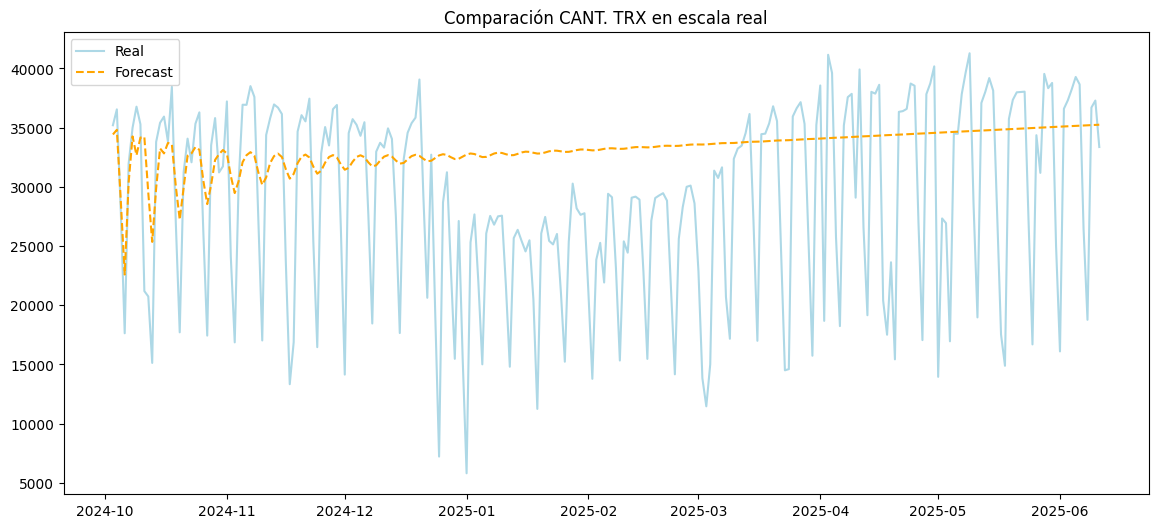

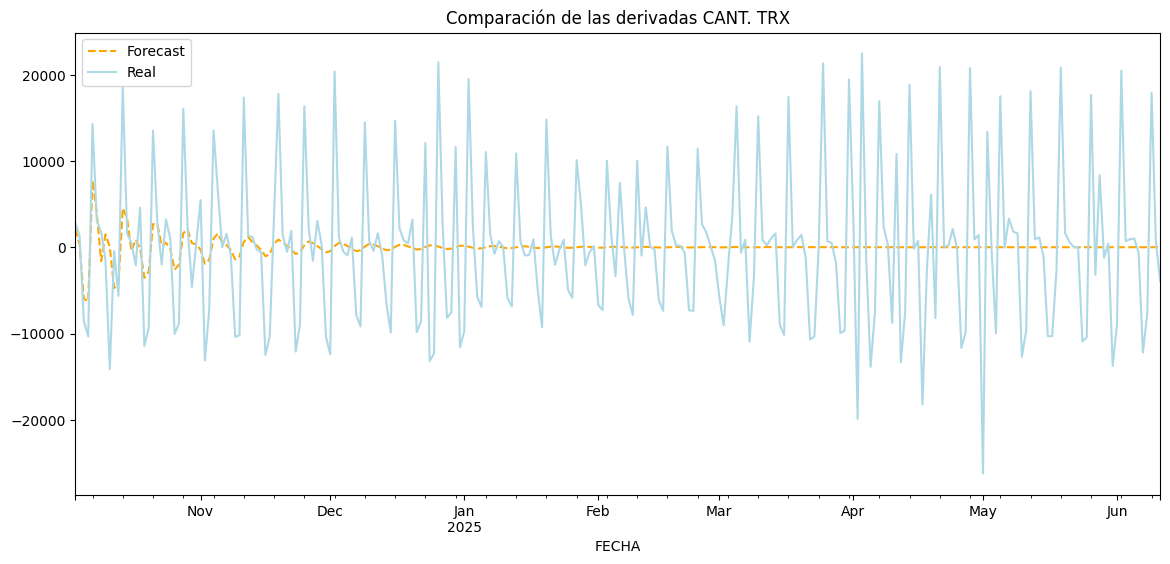

In [104]:
df_forecast_real = train_test_lineas['166'][2][['CANT. TRX', 'KM']].iloc[-len(df_test)-1] + df_forecast[['CANT. TRX', 'KM']].cumsum()

df_test_real = train_test_lineas['166'][2].loc[df_forecast_real.index, ['CANT. TRX', 'KM']]

plt.figure(figsize=(14, 6))

plt.plot(df_test_real.index, df_test_real['CANT. TRX'], label='Real', color="lightblue")
plt.plot(df_forecast_real.index, df_forecast_real['CANT. TRX'], label='Forecast', linestyle='--', color="orange")

plt.title('Comparación CANT. TRX en escala real')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))

df_forecast['CANT. TRX'].plot(label='Forecast', linestyle='--', color="orange")
df_test['CANT. TRX'].plot(label='Real', color="lightblue")

plt.title('Comparación de las derivadas CANT. TRX')
plt.legend()
plt.show()

In [105]:
# Métricas de error
mae = mean_absolute_error(df_test[:30]['CANT. TRX'], df_forecast[:30]['CANT. TRX'])
rmse = np.sqrt(mean_squared_error(df_test[:30]['CANT. TRX'], df_forecast[:30]['CANT. TRX']))
print("Métricas de error CANT. TRX")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")
mae = mean_absolute_error(df_test[:30]['KM'], df_forecast[:30]['KM'])
rmse = np.sqrt(mean_squared_error(df_test[:30]['KM'], df_forecast[:30]['KM']))
print("Métricas de error KM")
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")

Métricas de error CANT. TRX
MAE: 4598.84 | RMSE: 6188.97
Métricas de error KM
MAE: 1760.72 | RMSE: 2691.50


## **PROPHET**

Continuamos probando el modelo Facebook Prophet ya que es ideal para series con fuerte tendencia y estacionalidades múltiples ya que automatiza la detección de estacionalidades y tendencia.

In [99]:
df_train_prophet = train_test_lineas['166'][0].copy().reset_index().rename(columns={"FECHA": "ds", "CANT. TRX": "y"})
df_test_prophet = train_test_lineas['166'][1].copy().reset_index().rename(columns={"FECHA": "ds", "CANT. TRX": "y"})

model = Prophet()
model.fit(df_train_prophet)

future = model.make_future_dataframe(periods=len(df_test_prophet))  # predice 30 días más
forecast = model.predict(future)

forecast_test = forecast.set_index('ds').loc[df_test_prophet['ds']]


10:30:46 - cmdstanpy - INFO - Chain [1] start processing
10:30:46 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
# Métricas de error
mae = mean_absolute_error(df_test_prophet['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(df_test_prophet['y'], forecast_test['yhat']))
print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f}")

MAE: 3210.10 | RMSE: 4817.79


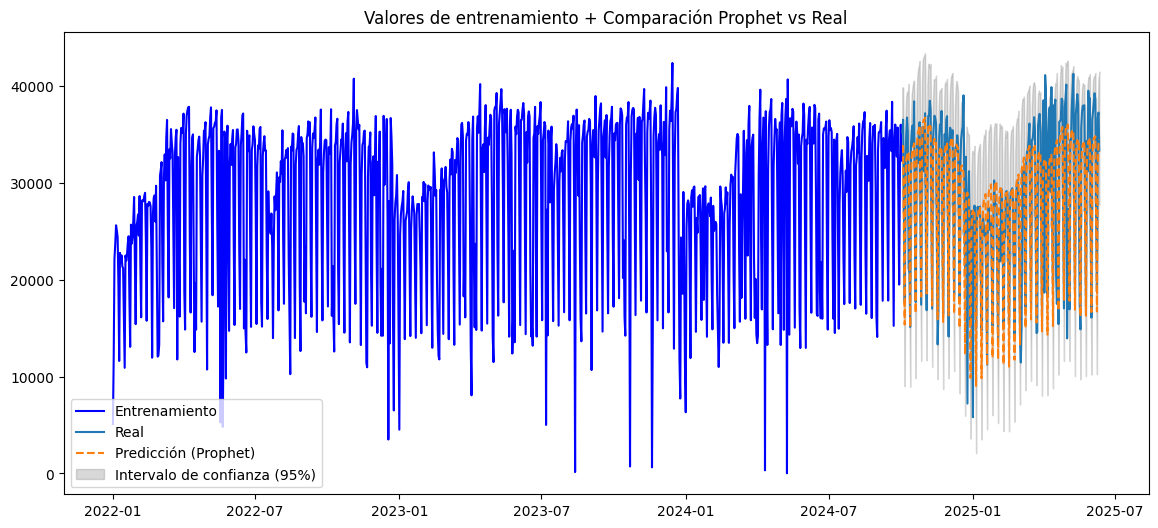

In [101]:

plt.figure(figsize=(14, 6))
# Datos entrenamiento
plt.plot(df_train_prophet['ds'], df_train_prophet['y'], label='Entrenamiento', color='blue')

plt.plot(df_test_prophet['ds'], df_test_prophet['y'], label='Real')
plt.plot(forecast_test.index, forecast_test['yhat'], label='Predicción (Prophet)', linestyle='--')
# Bandas de incertidumbre
plt.fill_between(forecast_test.index,
                 forecast_test['yhat_lower'],
                 forecast_test['yhat_upper'],
                 color='gray', alpha=0.3, label='Intervalo de confianza (95%)')

plt.title("Valores de entrenamiento + Comparación Prophet vs Real")
plt.legend()
plt.show()

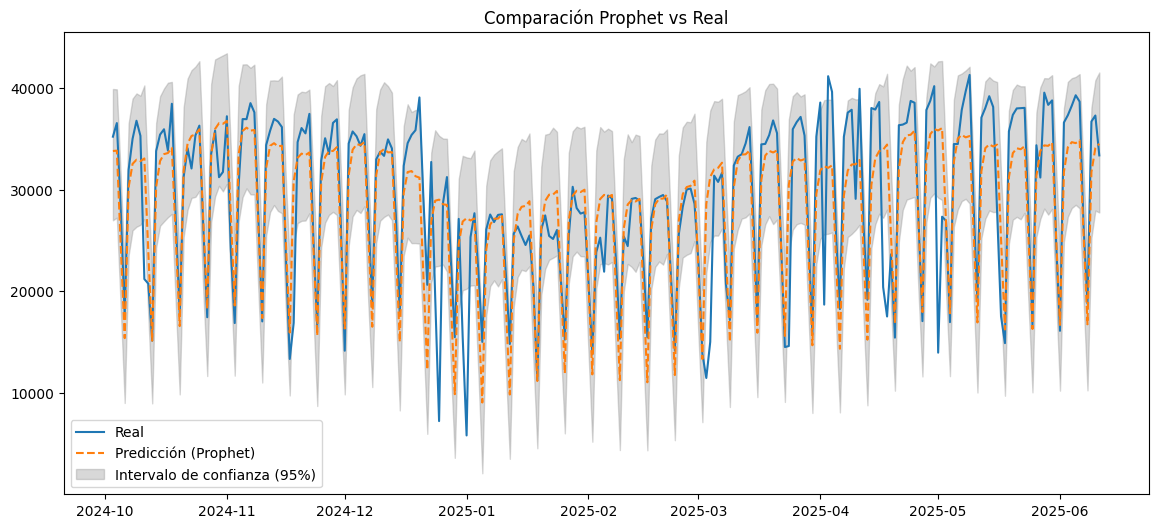

In [102]:

plt.figure(figsize=(14, 6))

plt.plot(df_test_prophet['ds'], df_test_prophet['y'], label='Real')
plt.plot(forecast_test.index, forecast_test['yhat'], label='Predicción (Prophet)', linestyle='--')
# Bandas de incertidumbre
plt.fill_between(forecast_test.index,
                 forecast_test['yhat_lower'],
                 forecast_test['yhat_upper'],
                 color='gray', alpha=0.3, label='Intervalo de confianza (95%)')

plt.title("Comparación Prophet vs Real")
plt.legend()
plt.show()

## **Comparación MAE y RMSE entre modelos**

- SARIMA(6,1,3)(1,1,1,7):
    - MAE: 3965.84 | RMSE: 5997.25
- Prophet:
    - MAE: 3210.10 | RMSE: 4817.79
- VARMA(6,1):
    - MAE: 6193.93 | RMSE: 8649.93. Aunque si se consideran solo los primeros 30 días de la predicción el modelo era más preciso con MAE: 4598.84 | RMSE: 6188.97.

## **Conclusiones finales**

Entre las situaciones difíciles con los datos se puede nombrar lo visto en el EDA donde se tuvo que recortar parte de la información debido a la pandemia.

Respondiendo la pregunta de investigación podemos afirmar que es posible predecir la demanda futura utilizando modelos de series temporales siendo el modelo que mejores resultados arrojó Facebook Prophet. Esto se debe a las características detectadas de las series de tiempo analizadas, principalmente lo referido a la estacionalidad de tipo semanal y también anual, cosas que Facebook Prophet está desarrollado para detectar y predecir.

Por último, como extra se podría a futuro buscar incorporar más variables a las predicciones como son por ejemplo, condiciones climáticas o feriados.